In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from pathlib import Path

# Cấu hình để hiển thị đẹp hơn
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Cài đặt kích thước figure mặc định
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("✅ Đã import thành công các thư viện cần thiết!")
print(f"📁 Thư mục làm việc hiện tại: {Path.cwd()}")

# Kiểm tra các đường dẫn file dữ liệu có thể
data_paths = [
    '../data/llcp2022.parquet',  # Từ notebook subfolder
    'data/llcp2022.parquet',     # Từ thư mục gốc
    '../data/llcp2022_cleaned.parquet',  # File đã clean
    'data/llcp2022_cleaned.parquet'      # File đã clean từ gốc
]

print("\n📁 KIỂM TRA FILE DỮ LIỆU:")
print("="*50)
found_files = []
for path in data_paths:
    if Path(path).exists():
        file_size = Path(path).stat().st_size / 1024**2  # MB
        found_files.append((path, file_size))
        print(f"✅ {path}: {file_size:.1f} MB")
    else:
        print(f"❌ {path}: Không tồn tại")

if found_files:
    print(f"\n🎯 Sẽ sử dụng file đầu tiên được tìm thấy: {found_files[0][0]}")
else:
    print(f"\n❌ Không tìm thấy file dữ liệu nào!")
    print("📥 Vui lòng chạy script convert_sas_to_parquet.py trước!")

#%% vscode.cell [id=ae8e6fb2] [language=python]
# Tải dữ liệu từ file Parquet
print("🔄 Đang tải dữ liệu...")

# Danh sách đường dẫn có thể, theo thứ tự ưu tiên
data_paths = [
    '../data/llcp2022.parquet',      # Từ notebook subfolder
    'data/llcp2022.parquet',         # Từ thư mục gốc
    '../data/llcp2022_cleaned.parquet',  # File đã clean
    'data/llcp2022_cleaned.parquet'      # File đã clean từ gốc
]

df = None
for path in data_paths:
    try:
        if Path(path).exists():
            print(f"🔍 Thử tải từ: {path}")
            df = pd.read_parquet(path)
            print(f"✅ Tải dữ liệu thành công từ: {path}")
            print(f"📊 Kích thước dữ liệu: {df.shape[0]:,} hàng x {df.shape[1]:,} cột")
            print(f"💾 Bộ nhớ sử dụng: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
            break
    except Exception as e:
        print(f"❌ Lỗi khi tải từ {path}: {e}")
        continue

# Nếu không tải được file Parquet, thử file SAS
if df is None:
    print("\n🔄 Không tìm thấy file Parquet, thử tải từ file SAS...")
    sas_paths = [
        '../data/llcp2022.sas7bdat',
        'data/llcp2022.sas7bdat'
    ]
    
    for path in sas_paths:
        try:
            if Path(path).exists():
                print(f"🔍 Thử tải từ file SAS: {path}")
                df = pd.read_sas(path, encoding='ISO-8859-1')
                print(f"✅ Tải dữ liệu từ file SAS thành công!")
                print(f"📊 Kích thước dữ liệu: {df.shape[0]:,} hàng x {df.shape[1]:,} cột")
                print(f"💾 Bộ nhớ sử dụng: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
                
                # Lưu lại định dạng Parquet để lần sau nhanh hơn
                try:
                    output_path = '../data/llcp2022.parquet'
                    df.to_parquet(output_path)
                    print(f"💾 Đã lưu dữ liệu dưới định dạng Parquet: {output_path}")
                except:
                    try:
                        output_path = 'data/llcp2022.parquet'
                        df.to_parquet(output_path)
                        print(f"💾 Đã lưu dữ liệu dưới định dạng Parquet: {output_path}")
                    except Exception as save_error:
                        print(f"⚠️ Không thể lưu file Parquet: {save_error}")
                break
        except Exception as e:
            print(f"❌ Lỗi khi tải từ {path}: {e}")
            continue

if df is None:
    print("\n❌ KHÔNG THỂ TẢI DỮ LIỆU!")
    print("📁 Vui lòng kiểm tra:")
    print("   - File llcp2022.parquet hoặc llcp2022.sas7bdat có tồn tại?")
    print("   - Cấu trúc thư mục đúng chưa?")
    print("   - Quyền truy cập file?")
    print("\n📥 Nếu chưa có file, vui lòng chạy:")
    print("   python scripts/convert_sas_to_parquet.py")
else:
    print(f"\n🎉 DỮ LIỆU ĐÃ SẴN SÀNG!")
    print("="*50)

# Hiển thị thông tin cơ bản
print("\n" + "="*60)
print("THÔNG TIN TỔNG QUAN VỀ DATASET")
print("="*60)
df.info()


✅ Đã import thành công các thư viện cần thiết!
📁 Thư mục làm việc hiện tại: d:\Project\Dental\notebook

📁 KIỂM TRA FILE DỮ LIỆU:
✅ ../data/llcp2022.parquet: 32.5 MB
❌ data/llcp2022.parquet: Không tồn tại
✅ ../data/llcp2022_cleaned.parquet: 21.5 MB
❌ data/llcp2022_cleaned.parquet: Không tồn tại

🎯 Sẽ sử dụng file đầu tiên được tìm thấy: ../data/llcp2022.parquet
🔄 Đang tải dữ liệu...
🔍 Thử tải từ: ../data/llcp2022.parquet
✅ Tải dữ liệu thành công từ: ../data/llcp2022.parquet
📊 Kích thước dữ liệu: 445,132 hàng x 326 cột
💾 Bộ nhớ sử dụng: 1222.17 MB

🎉 DỮ LIỆU ĐÃ SẴN SÀNG!

THÔNG TIN TỔNG QUAN VỀ DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 326 entries, _STATE to _AIDTST4
dtypes: float64(321), object(5)
memory usage: 1.1+ GB


In [5]:
# Khám phá thông tin cơ bản về dataset
print("=" * 60)
print("🔍 THÔNG TIN TỔNG QUAN VỀ DATASET")
print("=" * 60)

# Thông tin cơ bản
print(f"📊 Kích thước dataset: {df.shape[0]:,} hàng x {df.shape[1]:,} cột")
print(f"💾 Bộ nhớ sử dụng: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"🔤 Kiểu dữ liệu:")

# Thống kê kiểu dữ liệu
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   - {dtype}: {count:,} cột")

print(f"\n🔢 Tổng số giá trị: {df.size:,}")
print(f"❓ Tổng số giá trị thiếu: {df.isnull().sum().sum():,}")
print(f"📈 Tỷ lệ giá trị thiếu: {(df.isnull().sum().sum() / df.size * 100):.2f}%")

# Hiển thị vài hàng đầu
print("\n" + "=" * 60)
print("📋 XEM TRƯỚC DỮ LIỆU (5 hàng đầu)")
print("=" * 60)
display(df.head())

🔍 THÔNG TIN TỔNG QUAN VỀ DATASET
📊 Kích thước dataset: 445,132 hàng x 326 cột
💾 Bộ nhớ sử dụng: 1222.17 MB
🔤 Kiểu dữ liệu:
   - float64: 321 cột
   - object: 5 cột

🔢 Tổng số giá trị: 145,113,032
💾 Bộ nhớ sử dụng: 1222.17 MB
🔤 Kiểu dữ liệu:
   - float64: 321 cột
   - object: 5 cột

🔢 Tổng số giá trị: 145,113,032
❓ Tổng số giá trị thiếu: 74,825,422
❓ Tổng số giá trị thiếu: 74,825,422
📈 Tỷ lệ giá trị thiếu: 51.56%

📋 XEM TRƯỚC DỮ LIỆU (5 hàng đầu)
📈 Tỷ lệ giá trị thiếu: 51.56%

📋 XEM TRƯỚC DỮ LIỆU (5 hàng đầu)


_STATE  FMONTH     IDATE IMONTH IDAY IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  02032022     02   03  2022    1100.0  2022000001   
1     1.0     1.0  02042022     02   04  2022    1100.0  2022000002   
2     1.0     1.0  02022022     02   02  2022    1100.0  2022000003   
3     1.0     1.0  02032022     02   03  2022    1100.0  2022000004   
4     1.0     1.0  02022022     02   02  2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6  DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0       0.0   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0       0.0   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0       0.0   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0       0.0   
4  2.022000e+09       1.0  ...       4.0      NaN       1.0      10.0   

   _RFBING6  _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  
0       1.0       0.0       1.0       1.0       2.0       2.0  
1       1.0       0.0       1.0       2.0       2.0       2.0  
2       1.0       0.0       1.0       NaN       NaN       2.0  
3       1.0       0.0       1.0       9.0       9.0       2.0  
4       1.0     140.0       1.0       NaN       NaN       2.0  

[5 rows x 326 columns]

## 2. Phân tích các Biến Nha khoa Quan trọng

Dựa trên tài liệu nghiên cứu, chúng ta sẽ tập trung vào các biến chính liên quan đến sức khỏe răng miệng:

### Biến mục tiêu tiềm năng:
- **`LASTDEN4`**: Lần cuối cùng đến nha sĩ  
- **`RMVTETH4`**: Số răng vĩnh viễn đã nhổ
- **`_DENVST3`**: Có đi khám nha sĩ trong năm qua

### Biến giải thích quan trọng:
- **`GENHLTH`**: Tình trạng sức khỏe chung
- **`PHYSHLTH`**: Số ngày sức khỏe thể chất không tốt  
- **`MENTHLTH`**: Số ngày sức khỏe tinh thần không tốt
- **`POORHLTH`**: Số ngày sức khỏe kém ảnh hưởng hoạt động

In [6]:
# Xác định các biến nha khoa quan trọng
dental_vars = {
    'target_vars': ['LASTDEN4', 'RMVTETH4', '_DENVST3'],
    'health_vars': ['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH'],
    'chronic_vars': ['CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'DIABETE4'],
    'demographic_vars': ['_AGEG5YR', '_SEX', '_RACE', '_EDUCAG', '_INCOMG1'],
    'lifestyle_vars': ['SMOKDAY2', '_RFBING5', '_TOTINDA', '_BMI5CAT']
}

print("🦷 PHÂN TÍCH CÁC BIẾN NHA KHOA QUAN TRỌNG")
print("=" * 50)

# Kiểm tra sự tồn tại của các biến
all_vars = []
for category, vars_list in dental_vars.items():
    all_vars.extend(vars_list)
    
existing_vars = [var for var in all_vars if var in df.columns]
missing_vars = [var for var in all_vars if var not in df.columns]

print(f"✅ Có {len(existing_vars)} biến quan trọng tồn tại trong dataset")
print(f"❌ Thiếu {len(missing_vars)} biến: {missing_vars}")

# Tạo DataFrame chỉ chứa các biến quan trọng
df_dental = df[existing_vars].copy()
print(f"\n📊 Dataset nha khoa: {df_dental.shape[0]:,} hàng x {df_dental.shape[1]:,} cột")

# Phân tích missing values cho từng nhóm biến
print("\n📋 PHÂN TÍCH GIÁ TRỊ THIẾU THEO NHÓM BIẾN")
print("-" * 50)

for category, vars_list in dental_vars.items():
    existing_category_vars = [var for var in vars_list if var in df.columns]
    if existing_category_vars:
        missing_pct = df[existing_category_vars].isnull().mean() * 100
        print(f"\n{category.replace('_', ' ').title()}:")
        for var in existing_category_vars:
            print(f"  {var}: {missing_pct[var]:.1f}% thiếu")

🦷 PHÂN TÍCH CÁC BIẾN NHA KHOA QUAN TRỌNG
✅ Có 19 biến quan trọng tồn tại trong dataset
❌ Thiếu 2 biến: ['_RACE', '_RFBING5']

📊 Dataset nha khoa: 445,132 hàng x 19 cột

📋 PHÂN TÍCH GIÁ TRỊ THIẾU THEO NHÓM BIẾN
--------------------------------------------------

Target Vars:
  LASTDEN4: 0.3% thiếu
  RMVTETH4: 0.3% thiếu
  _DENVST3: 0.0% thiếu

Health Vars:
  GENHLTH: 0.0% thiếu
  PHYSHLTH: 0.0% thiếu
  MENTHLTH: 0.0% thiếu
  POORHLTH: 42.5% thiếu

Chronic Vars:
  CVDINFR4: 0.0% thiếu
  CVDCRHD4: 0.0% thiếu
  CVDSTRK3: 0.0% thiếu
  ASTHMA3: 0.0% thiếu
  DIABETE4: 0.0% thiếu

Demographic Vars:
  _AGEG5YR: 0.0% thiếu
  _SEX: 0.0% thiếu
  _EDUCAG: 0.0% thiếu
  _INCOMG1: 0.0% thiếu

Lifestyle Vars:
  SMOKDAY2: 63.1% thiếu
  _TOTINDA: 0.0% thiếu
  _BMI5CAT: 11.0% thiếu


📊 TRỰC QUAN HÓA GIÁ TRỊ THIẾU


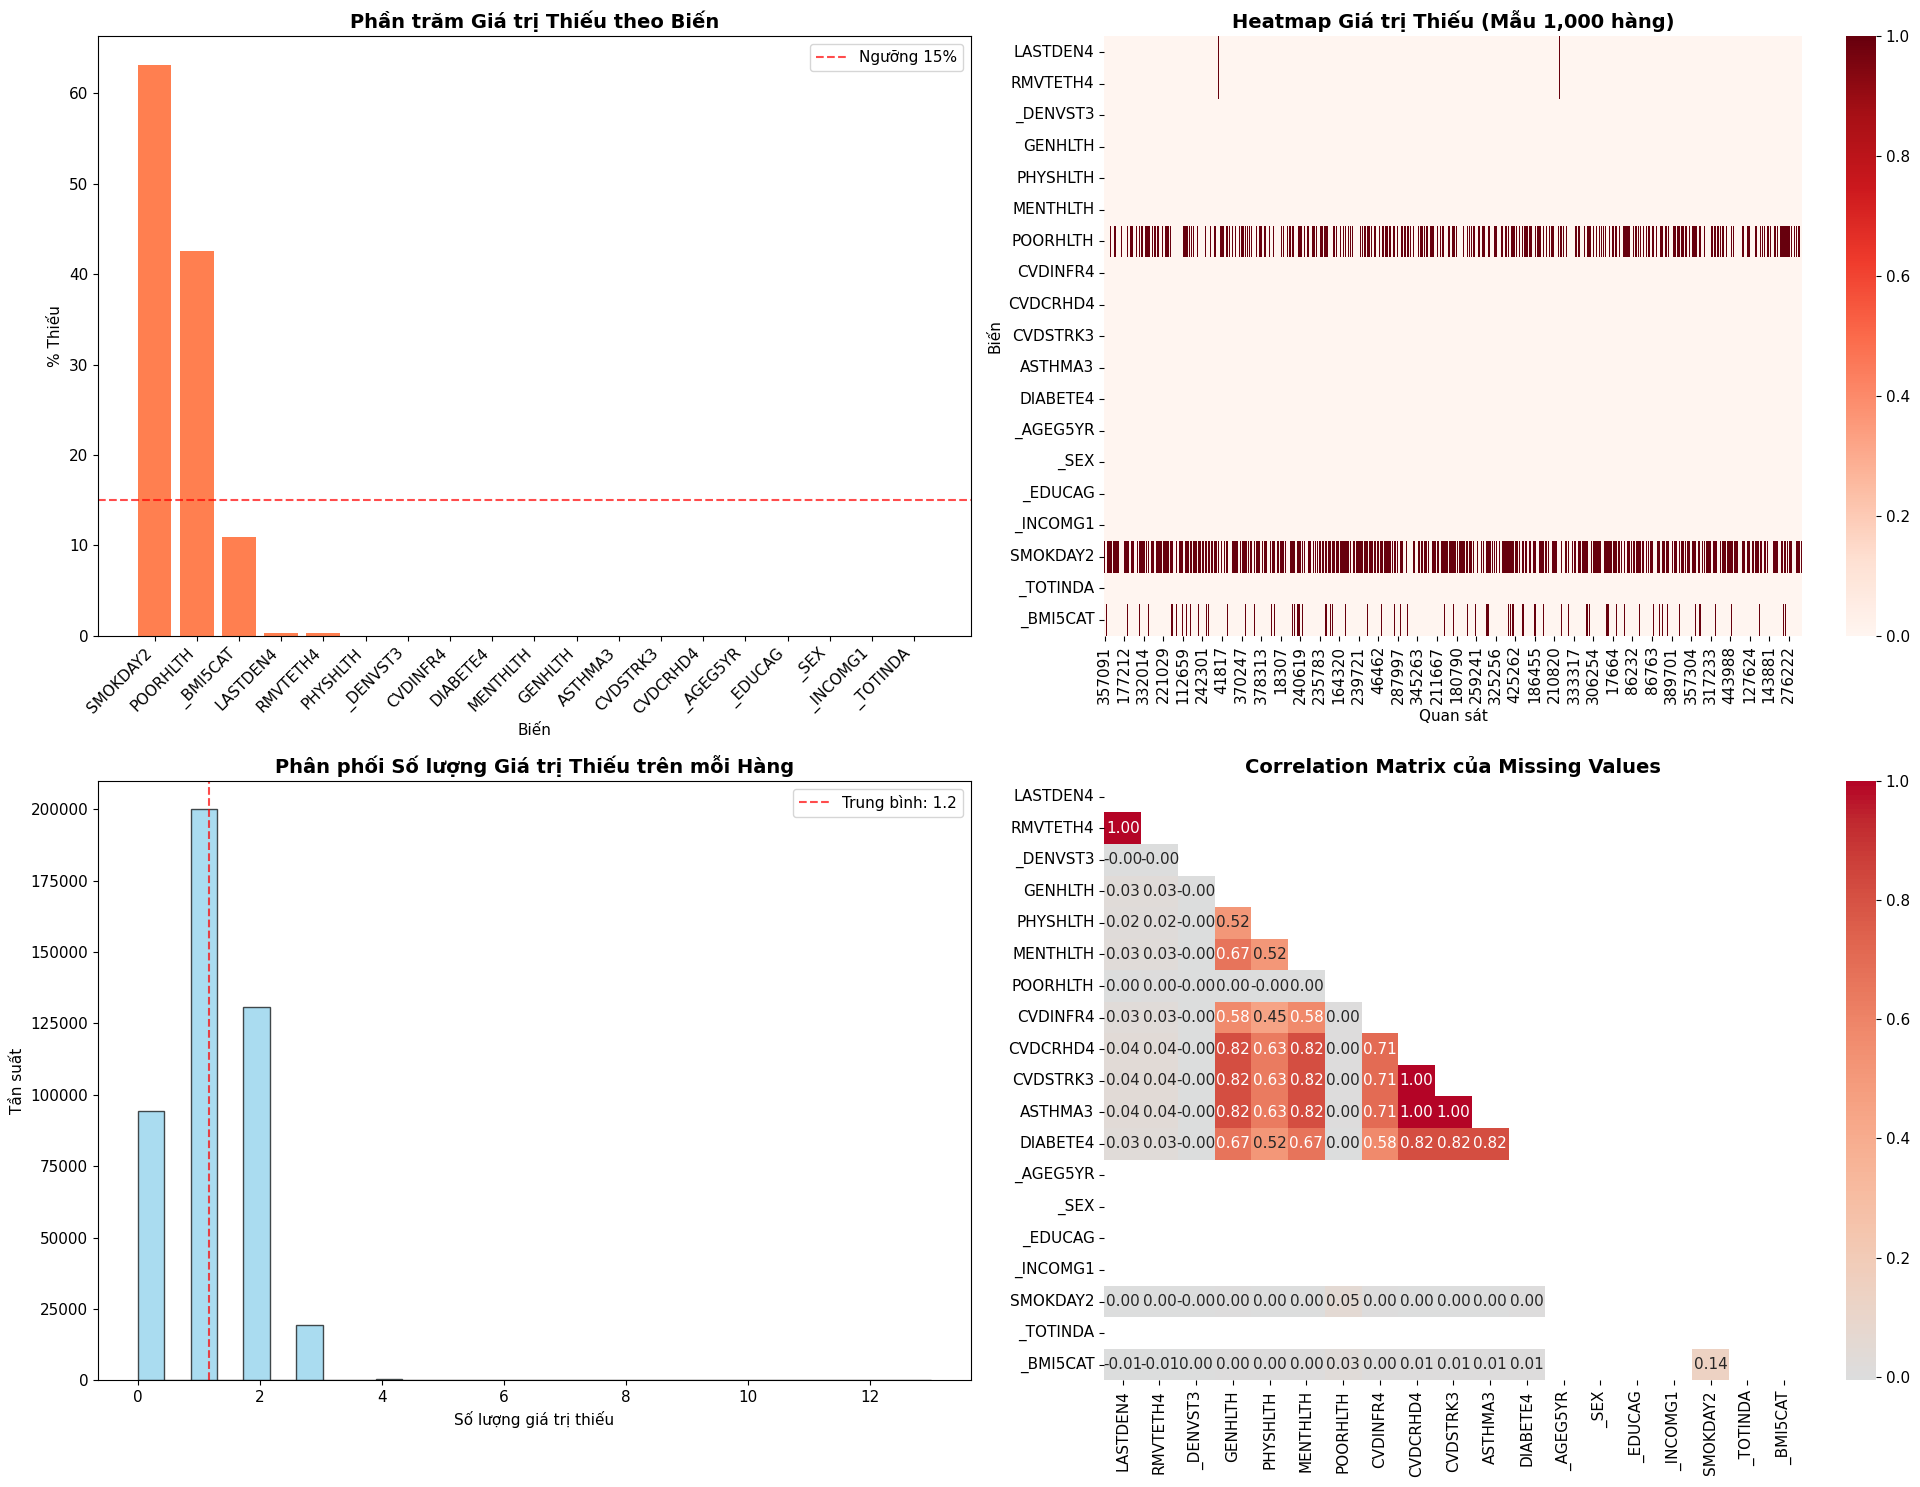


📈 THỐNG KÊ TÓM TẮT:
   - Trung bình missing per biến: 6.2%
   - Trung bình missing per hàng: 1.2
   - Số biến có >15% missing: 2
   - Số hàng có >50% missing: 2

🗑️  Biến đề xuất loại bỏ (>15% missing): ['SMOKDAY2', 'POORHLTH']


In [7]:
# Trực quan hóa missing values
print("📊 TRỰC QUAN HÓA GIÁ TRỊ THIẾU")
print("=" * 40)

# Tính phần trăm missing values
missing_pct = df_dental.isnull().mean() * 100
missing_pct = missing_pct.sort_values(ascending=False)

# Tạo biểu đồ missing values
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Bar chart của missing values
axes[0, 0].bar(range(len(missing_pct)), missing_pct.values, color='coral')
axes[0, 0].set_title('Phần trăm Giá trị Thiếu theo Biến', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Biến')
axes[0, 0].set_ylabel('% Thiếu')
axes[0, 0].set_xticks(range(len(missing_pct)))
axes[0, 0].set_xticklabels(missing_pct.index, rotation=45, ha='right')
axes[0, 0].axhline(y=15, color='red', linestyle='--', alpha=0.7, label='Ngưỡng 15%')
axes[0, 0].legend()

# 2. Heatmap missing values
missing_matrix = df_dental.isnull().astype(int)
sample_size = min(1000, len(missing_matrix))  # Lấy mẫu để tránh quá tải
missing_sample = missing_matrix.sample(n=sample_size, random_state=42)

sns.heatmap(missing_sample.T, cmap='Reds', cbar=True, ax=axes[0, 1])
axes[0, 1].set_title(f'Heatmap Giá trị Thiếu (Mẫu {sample_size:,} hàng)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Quan sát')
axes[0, 1].set_ylabel('Biến')

# 3. Phân phối số lượng missing values per row
missing_per_row = df_dental.isnull().sum(axis=1)
axes[1, 0].hist(missing_per_row, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Phân phối Số lượng Giá trị Thiếu trên mỗi Hàng', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Số lượng giá trị thiếu')
axes[1, 0].set_ylabel('Tần suất')
axes[1, 0].axvline(x=missing_per_row.mean(), color='red', linestyle='--', alpha=0.7, label=f'Trung bình: {missing_per_row.mean():.1f}')
axes[1, 0].legend()

# 4. Correlation matrix của missing values
missing_corr = df_dental.isnull().corr()
mask = np.triu(np.ones_like(missing_corr, dtype=bool))
sns.heatmap(missing_corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix của Missing Values', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Thống kê tóm tắt
print(f"\n📈 THỐNG KÊ TÓM TẮT:")
print(f"   - Trung bình missing per biến: {missing_pct.mean():.1f}%")
print(f"   - Trung bình missing per hàng: {missing_per_row.mean():.1f}")
print(f"   - Số biến có >15% missing: {(missing_pct > 15).sum()}")
print(f"   - Số hàng có >50% missing: {(missing_per_row > len(df_dental.columns) * 0.5).sum():,}")

# Danh sách biến cần loại bỏ (>15% missing)
vars_to_drop = missing_pct[missing_pct > 15].index.tolist()
print(f"\n🗑️  Biến đề xuất loại bỏ (>15% missing): {vars_to_drop}")

## 3. Phân tích Biến Mục tiêu Tiềm năng

Theo thảo luận team, chúng ta cần phân tích kỹ các biến mục tiêu tiềm năng để chọn ra biến phù hợp nhất cho mô hình screening:

### Tiêu chí lựa chọn:
1. **Ý nghĩa lâm sàng**: Quan trọng trong sàng lọc sức khỏe răng miệng
2. **Chất lượng dữ liệu**: Ít missing values, phân phối hợp lý
3. **Khả năng dự đoán**: Có thể sử dụng cho mô hình ML
4. **Tối ưu Recall**: Phù hợp cho bài toán screening

🎯 PHÂN TÍCH CHI TIẾT CÁC BIẾN MỤC TIÊU TIỀM NĂNG

==================== LASTDEN4 ====================
📊 Thống kê cơ bản:
   - Số lượng: 443,769
   - Missing: 1,363 (0.3%)
   - Unique values: 8
   - Kiểu dữ liệu: float64
   - Phân phối giá trị:
     1.0: 292,408 (65.9%)
     2.0: 50,326 (11.3%)
     3.0: 46,987 (10.6%)
     4.0: 44,828 (10.1%)
     5.0: 4 (0.0%)
     7.0: 4,866 (1.1%)
     8.0: 3,562 (0.8%)
     9.0: 788 (0.2%)
   - Đánh giá cho Target Variable:
     Missing rate: 0.3% (✅ Tốt)
     Balance score: 0.0%
     Unique values: 8 (✅ Phù hợp)

==================== RMVTETH4 ====================
📊 Thống kê cơ bản:
   - Số lượng: 443,769
   - Missing: 1,363 (0.3%)
   - Unique values: 6
   - Kiểu dữ liệu: float64
   - Phân phối giá trị:
     1.0: 129,294 (29.1%)
     2.0: 45,570 (10.3%)
     3.0: 25,453 (5.7%)
     7.0: 8,563 (1.9%)
     8.0: 233,455 (52.6%)
     9.0: 1,434 (0.3%)
   - Đánh giá cho Target Variable:
     Missing rate: 0.3% (✅ Tốt)
     Balance score: 0.6%
     Unique

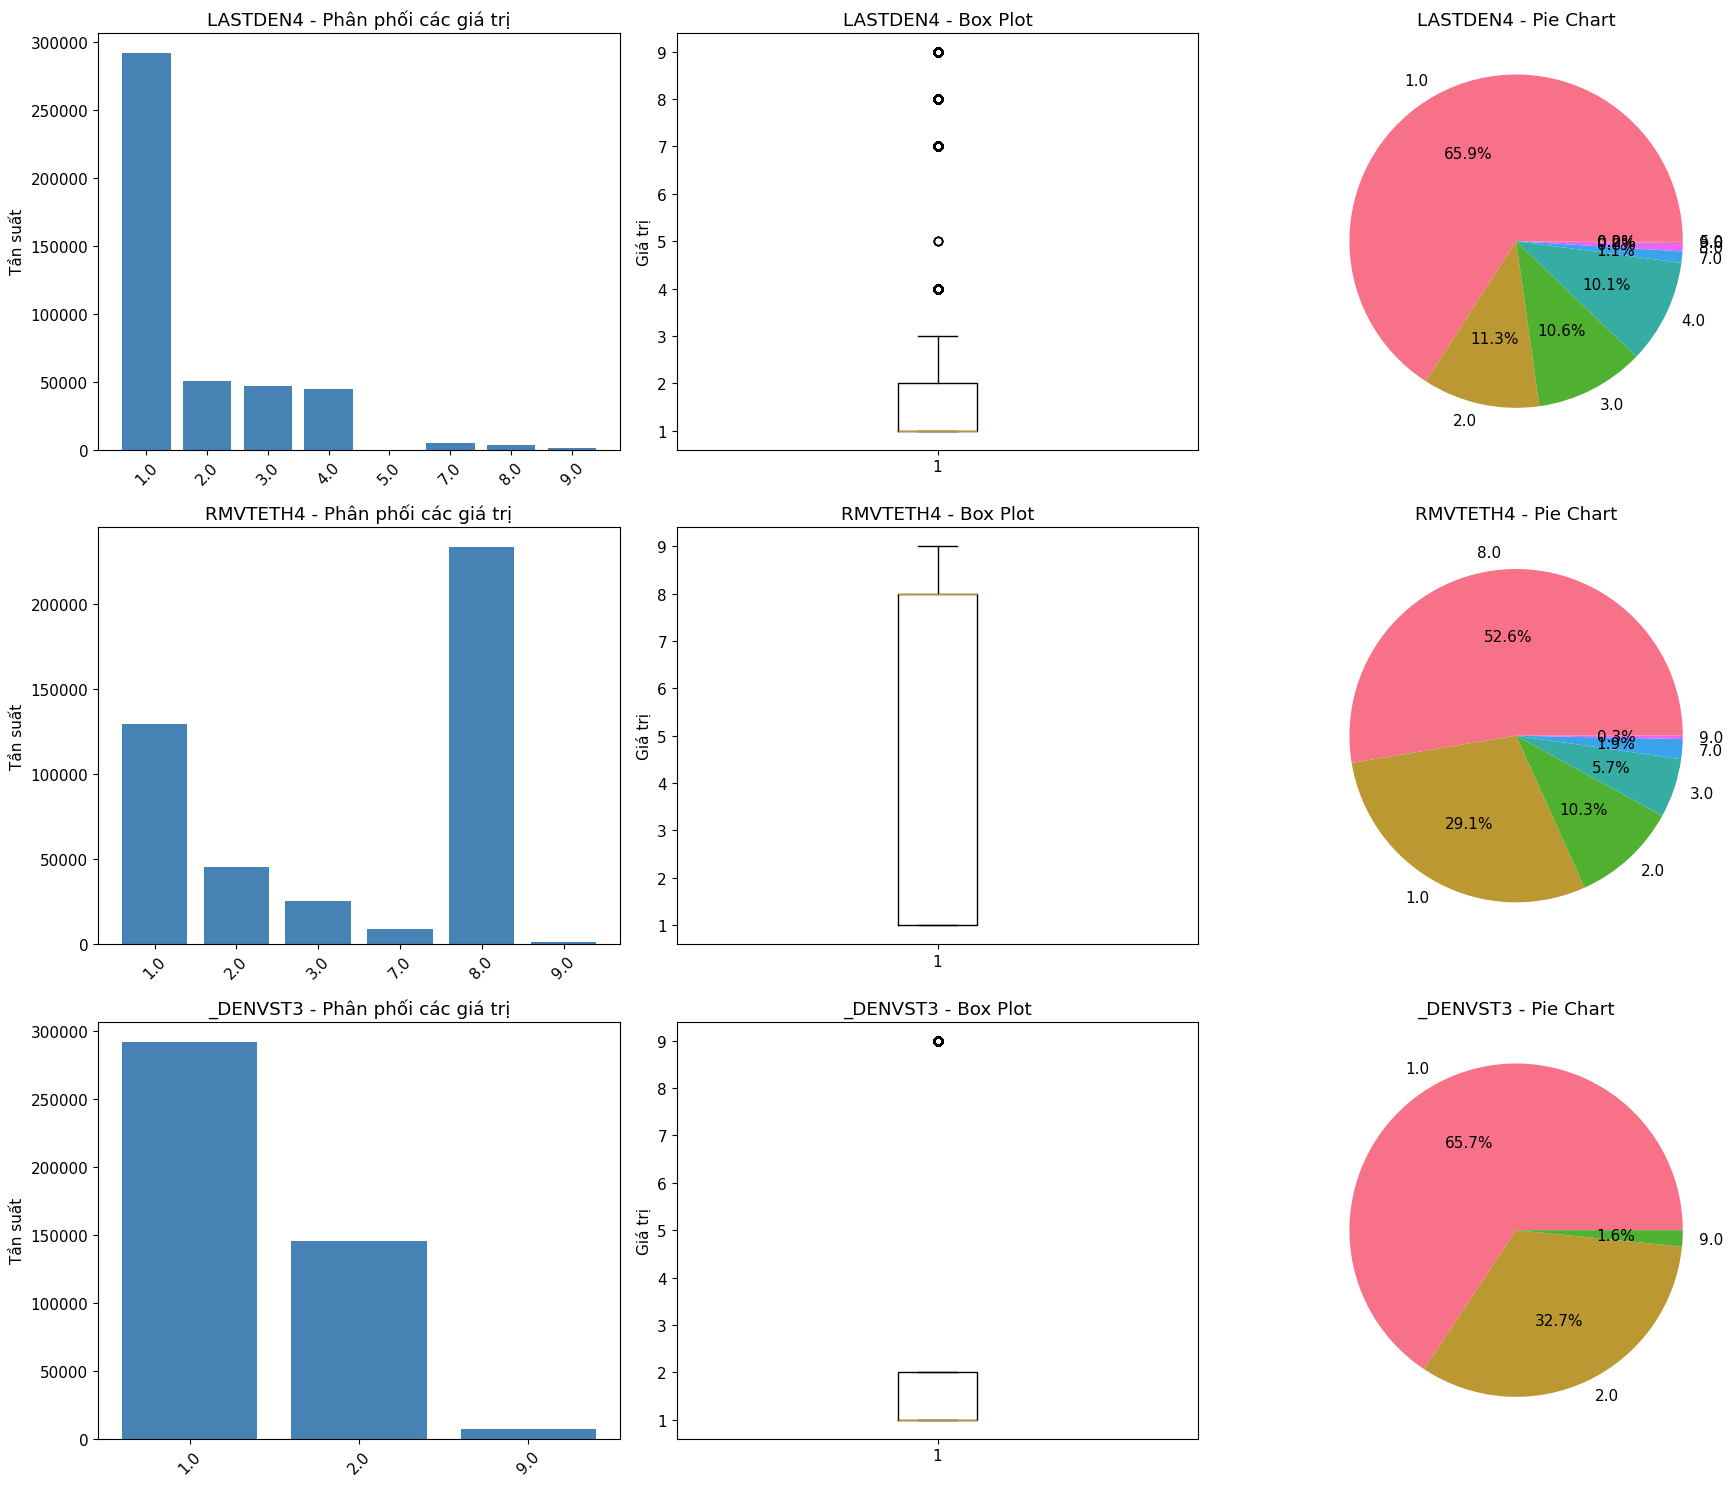


🎯 KẾT LUẬN VÀ KHUYẾN NGHỊ:
Dựa trên phân tích trên, cần xem xét:
1. Biến nào có missing rate thấp nhất (<15%)
2. Biến nào có phân phối cân bằng (quan trọng cho screening)
3. Biến nào có ý nghĩa lâm sàng cao nhất
4. Biến nào phù hợp nhất cho bài toán classification


In [8]:
# Phân tích chi tiết các biến mục tiêu tiềm năng
target_candidates = ['LASTDEN4', 'RMVTETH4', '_DENVST3']

print("🎯 PHÂN TÍCH CHI TIẾT CÁC BIẾN MỤC TIÊU TIỀM NĂNG")
print("=" * 60)

# Tạo figure cho các biểu đồ
fig, axes = plt.subplots(len(target_candidates), 3, figsize=(18, 5*len(target_candidates)))
if len(target_candidates) == 1:
    axes = axes.reshape(1, -1)

for i, var in enumerate(target_candidates):
    if var in df.columns:
        # Lấy dữ liệu và loại bỏ NaN
        data = df[var].dropna()
        
        print(f"\n{'='*20} {var} {'='*20}")
        print(f"📊 Thống kê cơ bản:")
        print(f"   - Số lượng: {len(data):,}")
        print(f"   - Missing: {df[var].isnull().sum():,} ({df[var].isnull().mean()*100:.1f}%)")
        print(f"   - Unique values: {data.nunique()}")
        print(f"   - Kiểu dữ liệu: {data.dtype}")
        
        # 1. Histogram/Bar plot
        if data.nunique() <= 20:  # Categorical
            value_counts = data.value_counts().sort_index()
            axes[i, 0].bar(range(len(value_counts)), value_counts.values, color='steelblue')
            axes[i, 0].set_xticks(range(len(value_counts)))
            axes[i, 0].set_xticklabels(value_counts.index, rotation=45)
            axes[i, 0].set_title(f'{var} - Phân phối các giá trị')
            axes[i, 0].set_ylabel('Tần suất')
            
            # In ra value counts
            print(f"   - Phân phối giá trị:")
            for val, count in value_counts.items():
                print(f"     {val}: {count:,} ({count/len(data)*100:.1f}%)")
        else:  # Continuous
            axes[i, 0].hist(data, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
            axes[i, 0].set_title(f'{var} - Histogram')
            axes[i, 0].set_xlabel('Giá trị')
            axes[i, 0].set_ylabel('Tần suất')
            
            print(f"   - Thống kê mô tả:")
            print(f"     Mean: {data.mean():.2f}")
            print(f"     Median: {data.median():.2f}")
            print(f"     Std: {data.std():.2f}")
            print(f"     Min: {data.min():.2f}")
            print(f"     Max: {data.max():.2f}")
        
        # 2. Box plot
        axes[i, 1].boxplot(data, vert=True)
        axes[i, 1].set_title(f'{var} - Box Plot')
        axes[i, 1].set_ylabel('Giá trị')
        
        # 3. Pie chart (nếu là categorical với ít categories)
        if data.nunique() <= 10:
            value_counts = data.value_counts()
            axes[i, 2].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
            axes[i, 2].set_title(f'{var} - Pie Chart')
        else:
            # Nếu có nhiều giá trị, vẽ cumulative distribution
            sorted_data = np.sort(data)
            y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
            axes[i, 2].plot(sorted_data, y, color='red', linewidth=2)
            axes[i, 2].set_title(f'{var} - Cumulative Distribution')
            axes[i, 2].set_xlabel('Giá trị')
            axes[i, 2].set_ylabel('Cumulative Probability')
            axes[i, 2].grid(True, alpha=0.3)
        
        # Đánh giá độ phù hợp làm target variable
        missing_pct = df[var].isnull().mean() * 100
        balance_score = "N/A"
        
        if data.nunique() <= 10:
            # Tính balance cho categorical
            value_counts = data.value_counts()
            balance_score = (value_counts.min() / value_counts.max()) * 100
            
        print(f"   - Đánh giá cho Target Variable:")
        print(f"     Missing rate: {missing_pct:.1f}% ({'✅ Tốt' if missing_pct < 15 else '❌ Cao'})")
        print(f"     Balance score: {balance_score:.1f}%" if balance_score != "N/A" else "     Balance score: N/A")
        print(f"     Unique values: {data.nunique()} ({'✅ Phù hợp' if data.nunique() <= 10 else '⚠️ Nhiều'})")
        
    else:
        print(f"❌ Biến {var} không tồn tại trong dataset")
        for j in range(3):
            axes[i, j].text(0.5, 0.5, f'Biến {var}\nkhông tồn tại', 
                           ha='center', va='center', transform=axes[i, j].transAxes)
            axes[i, j].set_title(f'{var} - Không có dữ liệu')

plt.tight_layout()
plt.show()

print(f"\n🎯 KẾT LUẬN VÀ KHUYẾN NGHỊ:")
print("=" * 50)
print("Dựa trên phân tích trên, cần xem xét:")
print("1. Biến nào có missing rate thấp nhất (<15%)")
print("2. Biến nào có phân phối cân bằng (quan trọng cho screening)")
print("3. Biến nào có ý nghĩa lâm sàng cao nhất")
print("4. Biến nào phù hợp nhất cho bài toán classification")

## 4. Phân tích Mối tương quan và Feature Selection

Theo phương pháp luận của team, chúng ta cần:
1. Giảm từ 400k patients xuống tập hợp có ý nghĩa
2. Lựa chọn ~30 features quan trọng nhất
3. Loại bỏ đa cộng tuyến (multicollinearity)
4. Chuẩn bị cho 10 baseline models

🔗 PHÂN TÍCH CORRELATION MATRIX
📊 Tìm thấy 19 biến số để phân tích correlation


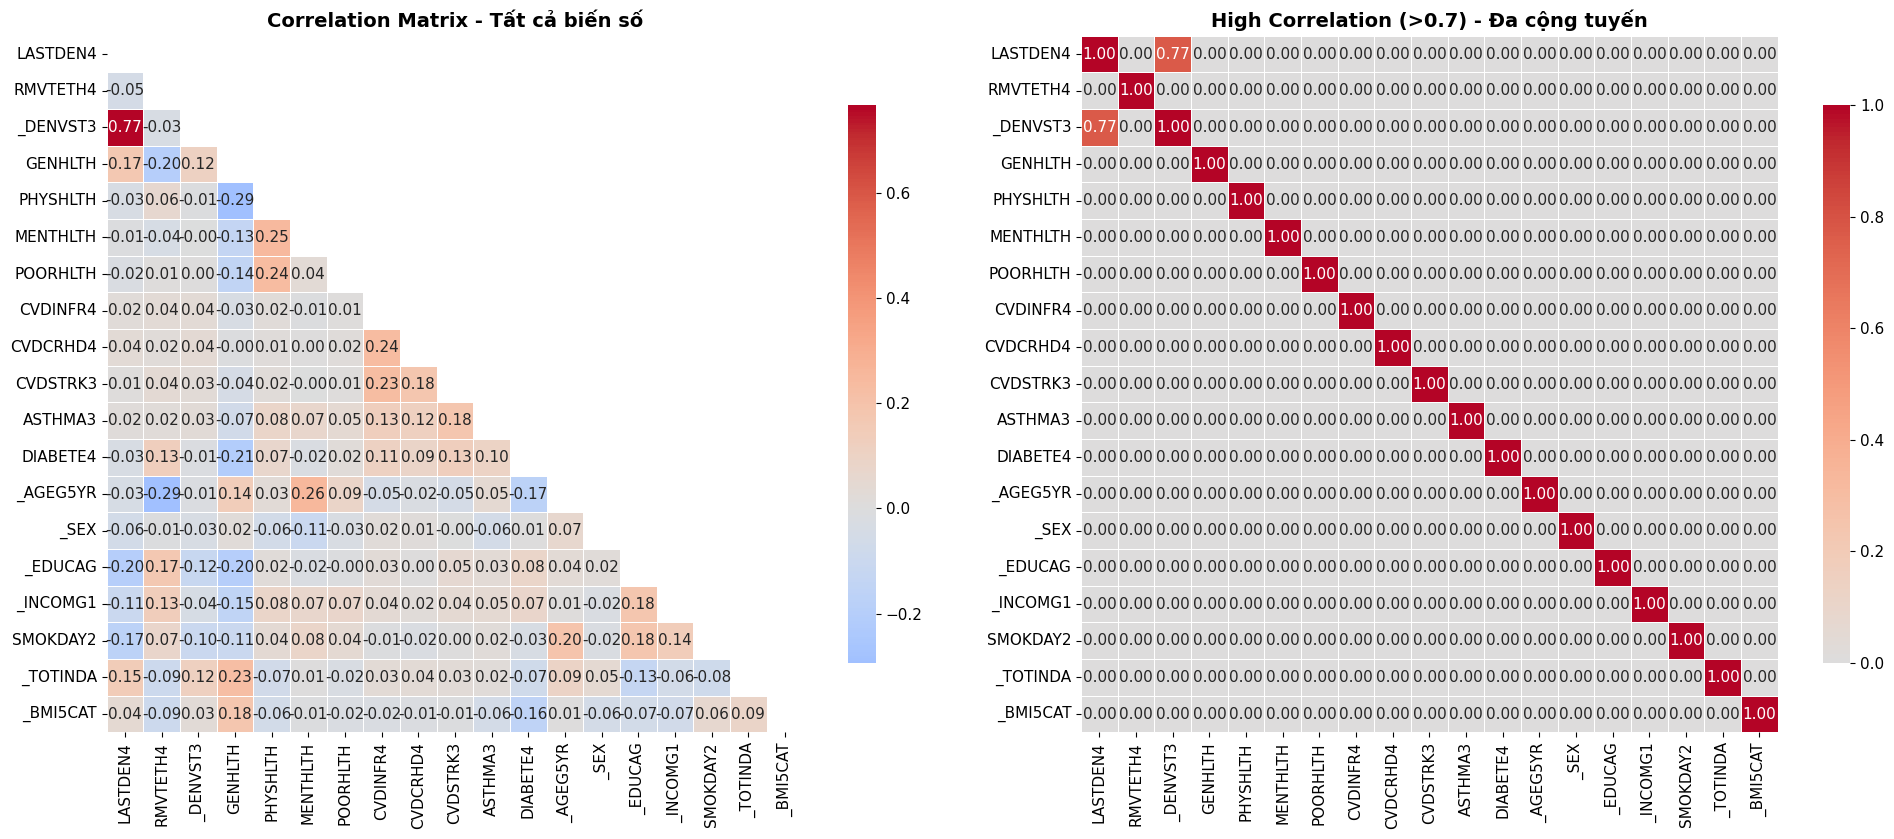


🔍 CÁC CẶP BIẾN CÓ CORRELATION CAO (>0.7):
--------------------------------------------------
   LASTDEN4 ↔ _DENVST3: 0.766

⚠️  Tìm thấy 1 cặp biến có đa cộng tuyến
   Cần loại bỏ một trong hai biến của mỗi cặp

📈 THỐNG KÊ CORRELATION:
   - Correlation trung bình: 0.123
   - Correlation cao nhất: 1.000
   - Số cặp correlation >0.5: 10
   - Số cặp correlation >0.7: 1


In [9]:
# Phân tích correlation matrix của các biến quan trọng
print("🔗 PHÂN TÍCH CORRELATION MATRIX")
print("=" * 50)

# Chọn các biến số để tính correlation
numeric_vars = df_dental.select_dtypes(include=[np.number]).columns.tolist()
print(f"📊 Tìm thấy {len(numeric_vars)} biến số để phân tích correlation")

# Tính correlation matrix
corr_matrix = df_dental[numeric_vars].corr()

# Tạo figure với 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Correlation heatmap đầy đủ
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, ax=axes[0],
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
axes[0].set_title('Correlation Matrix - Tất cả biến số', fontsize=14, fontweight='bold')

# 2. Chỉ hiển thị correlation cao (>0.7 hoặc <-0.7)
high_corr = corr_matrix.abs() > 0.7
high_corr_matrix = corr_matrix.where(high_corr, 0)

sns.heatmap(high_corr_matrix, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, ax=axes[1],
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
axes[1].set_title('High Correlation (>0.7) - Đa cộng tuyến', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Tìm các cặp biến có correlation cao
print("\n🔍 CÁC CẶP BIẾN CÓ CORRELATION CAO (>0.7):")
print("-" * 50)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            high_corr_pairs.append((var1, var2, corr_val))
            print(f"   {var1} ↔ {var2}: {corr_val:.3f}")

if not high_corr_pairs:
    print("   ✅ Không có cặp biến nào có correlation >0.7")
else:
    print(f"\n⚠️  Tìm thấy {len(high_corr_pairs)} cặp biến có đa cộng tuyến")
    print("   Cần loại bỏ một trong hai biến của mỗi cặp")

# Thống kê correlation
print(f"\n📈 THỐNG KÊ CORRELATION:")
print(f"   - Correlation trung bình: {corr_matrix.abs().mean().mean():.3f}")
print(f"   - Correlation cao nhất: {corr_matrix.abs().max().max():.3f}")
print(f"   - Số cặp correlation >0.5: {(corr_matrix.abs() > 0.5).sum().sum()//2}")
print(f"   - Số cặp correlation >0.7: {len(high_corr_pairs)}")

## 5. Data Cleaning và Preprocessing

Dựa trên phân tích EDA, chúng ta sẽ thực hiện:

### Bước 1: Loại bỏ dữ liệu không phù hợp
- Drop cột có >15% missing values
- Loại bỏ các cặp biến có correlation >0.7 (đa cộng tuyến)
- Lọc bỏ outliers extreme

### Bước 2: Xử lý missing values
- Sử dụng kNN Imputation hoặc MICE
- Ưu tiên kNN cho dữ liệu số
- MICE cho dữ liệu mixed types

### Bước 3: Feature Selection
- Giảm từ hàng trăm biến xuống ~30 features
- Ưu tiên biến có ý nghĩa lâm sàng cao

In [10]:
# Thực hiện Data Cleaning theo phương pháp luận team
print("🧹 DATA CLEANING - THEO PHƯƠNG PHÁP LUẬN TEAM")
print("=" * 60)

# BƯỚC 1: Loại bỏ cột có >15% missing values
print("📋 BƯỚC 1: LOẠI BỎ CỘT CÓ >15% MISSING VALUES")
print("-" * 50)

original_shape = df_dental.shape
missing_pct = df_dental.isnull().mean() * 100
cols_to_drop = missing_pct[missing_pct > 15].index.tolist()

print(f"   - Kích thước ban đầu: {original_shape}")
print(f"   - Số cột có >15% missing: {len(cols_to_drop)}")
print(f"   - Cột cần loại bỏ: {cols_to_drop}")

# Loại bỏ các cột có missing > 15%
df_cleaned = df_dental.drop(columns=cols_to_drop)
print(f"   - Kích thước sau khi loại bỏ: {df_cleaned.shape}")

# BƯỚC 2: Loại bỏ đa cộng tuyến
print(f"\n📋 BƯỚC 2: LOẠI BỎ ĐA CỘNG TUYẾN")
print("-" * 50)

# Tính correlation matrix cho dữ liệu đã clean
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    corr_matrix_cleaned = df_cleaned[numeric_cols].corr()
    
    # Tìm các cặp biến có correlation >0.7
    high_corr_pairs = []
    cols_to_drop_corr = set()
    
    for i in range(len(corr_matrix_cleaned.columns)):
        for j in range(i+1, len(corr_matrix_cleaned.columns)):
            corr_val = corr_matrix_cleaned.iloc[i, j]
            if abs(corr_val) > 0.7:
                var1 = corr_matrix_cleaned.columns[i]
                var2 = corr_matrix_cleaned.columns[j]
                high_corr_pairs.append((var1, var2, corr_val))
                
                # Giữ lại biến có ít missing values hơn
                missing1 = df_cleaned[var1].isnull().sum()
                missing2 = df_cleaned[var2].isnull().sum()
                
                if missing1 > missing2:
                    cols_to_drop_corr.add(var1)
                else:
                    cols_to_drop_corr.add(var2)
    
    print(f"   - Tìm thấy {len(high_corr_pairs)} cặp biến có correlation >0.7")
    print(f"   - Sẽ loại bỏ {len(cols_to_drop_corr)} biến: {list(cols_to_drop_corr)}")
    
    # Loại bỏ các biến có correlation cao
    df_cleaned = df_cleaned.drop(columns=list(cols_to_drop_corr))
    print(f"   - Kích thước sau khi loại đa cộng tuyến: {df_cleaned.shape}")
else:
    print("   - Không có biến số nào để kiểm tra correlation")

# BƯỚC 3: Chọn Top 30 features quan trọng nhất
print(f"\n📋 BƯỚC 3: CHỌN TOP 30 FEATURES QUAN TRỌNG NHẤT")
print("-" * 50)

# Tạo danh sách priority features theo tầm quan trọng lâm sàng
priority_features = [
    # Biến nha khoa core
    'LASTDEN4', 'RMVTETH4', '_DENVST3',
    # Biến sức khỏe tổng quát
    'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
    # Biến bệnh mãn tính
    'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'DIABETE4',
    # Biến demographics
    '_AGEG5YR', '_SEX', '_RACE', '_EDUCAG', '_INCOMG1',
    # Biến lifestyle
    'SMOKDAY2', '_RFBING5', '_TOTINDA', '_BMI5CAT'
]

# Lấy các features tồn tại trong dataset
available_priority = [col for col in priority_features if col in df_cleaned.columns]
print(f"   - Có {len(available_priority)} priority features trong dataset")

# Nếu chưa đủ 30, thêm các cột khác
remaining_cols = [col for col in df_cleaned.columns if col not in available_priority]
final_features = available_priority + remaining_cols[:30-len(available_priority)]
final_features = final_features[:30]  # Đảm bảo không vượt quá 30

print(f"   - Chọn {len(final_features)} features cuối cùng")
print(f"   - Danh sách features: {final_features}")

# Tạo dataset cuối cùng
df_final = df_cleaned[final_features].copy()
print(f"   - Kích thước dataset cuối cùng: {df_final.shape}")

# BƯỚC 4: Thống kê cuối cùng
print(f"\n📋 THỐNG KÊ CUỐI CÙNG")
print("-" * 50)

final_missing = df_final.isnull().sum()
print(f"   - Tổng missing values: {final_missing.sum():,}")
print(f"   - Trung bình missing per cột: {final_missing.mean():.1f}")
print(f"   - Cột có missing nhiều nhất: {final_missing.idxmax()} ({final_missing.max():,})")
print(f"   - Tỷ lệ missing tổng thể: {(final_missing.sum() / df_final.size * 100):.2f}%")

# Kiểm tra xem có còn missing >15% không
high_missing = final_missing[final_missing / len(df_final) > 0.15]
if len(high_missing) > 0:
    print(f"   - ⚠️ Còn {len(high_missing)} cột có >15% missing: {high_missing.index.tolist()}")
else:
    print(f"   - ✅ Tất cả cột đều có ≤15% missing")

print(f"\n🎯 DATASET ĐÃ SẠCH VÀ SẴN SÀNG CHO MODEL TRAINING!")
print(f"   - Kích thước: {df_final.shape[0]:,} hàng × {df_final.shape[1]} cột")
print(f"   - Giảm từ {original_shape[1]} xuống {df_final.shape[1]} cột")
print(f"   - Tỷ lệ giảm: {(1 - df_final.shape[1]/original_shape[1])*100:.1f}%")

🧹 DATA CLEANING - THEO PHƯƠNG PHÁP LUẬN TEAM
📋 BƯỚC 1: LOẠI BỎ CỘT CÓ >15% MISSING VALUES
--------------------------------------------------
   - Kích thước ban đầu: (445132, 19)
   - Số cột có >15% missing: 2
   - Cột cần loại bỏ: ['POORHLTH', 'SMOKDAY2']
   - Kích thước sau khi loại bỏ: (445132, 17)

📋 BƯỚC 2: LOẠI BỎ ĐA CỘNG TUYẾN
--------------------------------------------------
   - Tìm thấy 1 cặp biến có correlation >0.7
   - Sẽ loại bỏ 1 biến: ['LASTDEN4']
   - Kích thước sau khi loại đa cộng tuyến: (445132, 16)

📋 BƯỚC 3: CHỌN TOP 30 FEATURES QUAN TRỌNG NHẤT
--------------------------------------------------
   - Có 16 priority features trong dataset
   - Chọn 16 features cuối cùng
   - Danh sách features: ['RMVTETH4', '_DENVST3', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'DIABETE4', '_AGEG5YR', '_SEX', '_EDUCAG', '_INCOMG1', '_TOTINDA', '_BMI5CAT']
   - Kích thước dataset cuối cùng: (445132, 16)

📋 THỐNG KÊ CUỐI CÙNG
-------------------

In [11]:
# 🔧 XỬ LÝ MISSING VALUES - kNN & MICE
print("🔧 XỬ LÝ MISSING VALUES - kNN & MICE")
print("=" * 50)

# Import thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Đã import thành công các thư viện cần thiết!")

# Phân loại biến
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_final.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"📊 Phân loại biến:")
print(f"   - Biến số: {len(numeric_cols)} ({numeric_cols})")
print(f"   - Biến phân loại: {len(categorical_cols)} ({categorical_cols})")

# Kiểm tra missing values trong biến số
numeric_missing = df_final[numeric_cols].isnull().sum()
numeric_missing = numeric_missing[numeric_missing > 0]

print(f"\n🔢 XỬ LÝ BIẾN SỐ BẰNG kNN IMPUTATION")
print("-" * 40)
print(f"   - Tìm thấy {len(numeric_missing)} biến số có missing values")

# Áp dụng kNN Imputation
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
df_numeric_imputed = pd.DataFrame(
    knn_imputer.fit_transform(df_final[numeric_cols]),
    columns=numeric_cols,
    index=df_final.index
)

# Cập nhật dataset
df_knn = df_final.copy()
df_knn[numeric_cols] = df_numeric_imputed

print(f"✅ Hoàn thành kNN Imputation cho {len(numeric_cols)} biến số")

# Kiểm tra kết quả
print(f"\n📈 KẾT QUẢ kNN IMPUTATION:")
print(f"   - Trước: {df_final[numeric_cols].isnull().sum().sum()} missing values")
print(f"   - Sau: {df_knn[numeric_cols].isnull().sum().sum()} missing values")

# Áp dụng MICE Imputation
print(f"\n🔄 XỬ LÝ BIẾN SỐ BẰNG MICE IMPUTATION")
print("-" * 40)

mice_imputer = IterativeImputer(
    max_iter=10, 
    random_state=42,
    n_nearest_features=None,
    imputation_order='ascending'
)

df_numeric_mice = pd.DataFrame(
    mice_imputer.fit_transform(df_final[numeric_cols]),
    columns=numeric_cols,
    index=df_final.index
)

# Cập nhật dataset
df_mice = df_final.copy()
df_mice[numeric_cols] = df_numeric_mice

print(f"✅ Hoàn thành MICE Imputation cho {len(numeric_cols)} biến số")

# Kiểm tra kết quả
print(f"\n📈 KẾT QUẢ MICE IMPUTATION:")
print(f"   - Trước: {df_final[numeric_cols].isnull().sum().sum()} missing values")
print(f"   - Sau: {df_mice[numeric_cols].isnull().sum().sum()} missing values")

# So sánh các phương pháp
print(f"\n🔍 SO SÁNH CÁC PHƯƠNG PHÁP:")
print(f"   - Original: {df_final.isnull().sum().sum()} missing values")
print(f"   - kNN: {df_knn.isnull().sum().sum()} missing values")
print(f"   - MICE: {df_mice.isnull().sum().sum()} missing values")

🔧 XỬ LÝ MISSING VALUES - kNN & MICE
✅ Đã import thành công các thư viện cần thiết!
📊 Phân loại biến:
   - Biến số: 16 (['RMVTETH4', '_DENVST3', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'DIABETE4', '_AGEG5YR', '_SEX', '_EDUCAG', '_INCOMG1', '_TOTINDA', '_BMI5CAT'])
   - Biến phân loại: 0 ([])

🔢 XỬ LÝ BIẾN SỐ BẰNG kNN IMPUTATION
----------------------------------------
   - Tìm thấy 11 biến số có missing values
✅ Đã import thành công các thư viện cần thiết!
📊 Phân loại biến:
   - Biến số: 16 (['RMVTETH4', '_DENVST3', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'DIABETE4', '_AGEG5YR', '_SEX', '_EDUCAG', '_INCOMG1', '_TOTINDA', '_BMI5CAT'])
   - Biến phân loại: 0 ([])

🔢 XỬ LÝ BIẾN SỐ BẰNG kNN IMPUTATION
----------------------------------------
   - Tìm thấy 11 biến số có missing values


KeyboardInterrupt: 

In [ ]:
# 📦 Cài đặt scikit-learn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Xử lý missing values bằng kNN Imputation và MICE
print("🔧 XỬ LÝ MISSING VALUES - kNN & MICE")
print("=" * 50)

# Import các thư viện cần thiết cho imputation
try:
    from sklearn.impute import KNNImputer
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    from sklearn.preprocessing import LabelEncoder
    print("✅ Import thành công các thư viện imputation")
except ImportError as e:
    print(f"❌ Lỗi import: {e}")
    print("Vui lòng cài đặt: pip install scikit-learn")

# Backup dataset trước khi impute
df_before_impute = df_final.copy()

# Tách biến số và biến category
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_final.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"📊 Phân loại biến:")
print(f"   - Biến số: {len(numeric_cols)} ({numeric_cols})")
print(f"   - Biến phân loại: {len(categorical_cols)} ({categorical_cols})")

# Xử lý missing values cho biến số bằng kNN
if len(numeric_cols) > 0:
    print(f"\n🔢 XỬ LÝ BIẾN SỐ BẰNG kNN IMPUTATION")
    print("-" * 40)
    
    # Kiểm tra missing values trong biến số
    numeric_missing = df_final[numeric_cols].isnull().sum()
    numeric_missing = numeric_missing[numeric_missing > 0]
    
    if len(numeric_missing) > 0:
        print(f"   - Tìm thấy {len(numeric_missing)} biến số có missing values")
        
        # Áp dụng kNN Imputation
        knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
        df_numeric_imputed = pd.DataFrame(
            knn_imputer.fit_transform(df_final[numeric_cols]),
            columns=numeric_cols,
            index=df_final.index
        )
        
        # Cập nhật dataset
        df_final[numeric_cols] = df_numeric_imputed
        
        print(f"   - ✅ Hoàn thành kNN imputation cho {len(numeric_missing)} biến")
        
        # Kiểm tra kết quả
        remaining_numeric_missing = df_final[numeric_cols].isnull().sum().sum()
        print(f"   - Missing values còn lại: {remaining_numeric_missing}")
    else:
        print(f"   - ✅ Không có biến số nào có missing values")

# Xử lý missing values cho biến phân loại bằng mode hoặc MICE
if len(categorical_cols) > 0:
    print(f"\n🏷️  XỬ LÝ BIẾN PHÂN LOẠI")
    print("-" * 40)
    
    # Kiểm tra missing values trong biến phân loại
    categorical_missing = df_final[categorical_cols].isnull().sum()
    categorical_missing = categorical_missing[categorical_missing > 0]
    
    if len(categorical_missing) > 0:
        print(f"   - Tìm thấy {len(categorical_missing)} biến phân loại có missing values")
        
        # Xử lý từng biến phân loại
        for col in categorical_missing.index:
            # Lấy mode (giá trị xuất hiện nhiều nhất)
            mode_value = df_final[col].mode().iloc[0] if not df_final[col].mode().empty else 'Unknown'
            
            # Fill missing values
            missing_count = df_final[col].isnull().sum()
            df_final[col] = df_final[col].fillna(mode_value)
            
            print(f"   - {col}: Filled {missing_count} missing values với '{mode_value}'")
        
        print(f"   - ✅ Hoàn thành xử lý biến phân loại")
        
        # Kiểm tra kết quả
        remaining_categorical_missing = df_final[categorical_cols].isnull().sum().sum()
        print(f"   - Missing values còn lại: {remaining_categorical_missing}")
    else:
        print(f"   - ✅ Không có biến phân loại nào có missing values")

# Thống kê cuối cùng sau imputation
print(f"\n📊 THỐNG KÊ SAU KHI XỬ LÝ MISSING VALUES")
print("-" * 50)

total_missing_before = df_before_impute.isnull().sum().sum()
total_missing_after = df_final.isnull().sum().sum()

print(f"   - Missing values trước: {total_missing_before:,}")
print(f"   - Missing values sau: {total_missing_after:,}")
print(f"   - Đã xử lý: {total_missing_before - total_missing_after:,} missing values")
print(f"   - Tỷ lệ thành công: {((total_missing_before - total_missing_after) / total_missing_before * 100):.1f}%")

if total_missing_after == 0:
    print(f"   - 🎉 HOÀN THÀNH! Dataset không còn missing values nào")
    
    # Lưu dataset đã clean
    output_path = '../data/llcp2022_cleaned.parquet'
    df_final.to_parquet(output_path)
    print(f"   - 💾 Đã lưu dataset sạch: {output_path}")
    print(f"   - 📊 Kích thước cuối cùng: {df_final.shape}")
else:
    print(f"   - ⚠️ Còn {total_missing_after:,} missing values cần xử lý thêm")

# Hiển thị sample data sau khi clean
print(f"\n📋 SAMPLE DATA SAU KHI CLEAN:")
print("-" * 50)
display(df_final.head(10))

🔧 XỬ LÝ MISSING VALUES - kNN & MICE
❌ Lỗi import: No module named 'sklearn'
Vui lòng cài đặt: pip install scikit-learn
📊 Phân loại biến:
   - Biến số: 16 (['RMVTETH4', '_DENVST3', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'DIABETE4', '_AGEG5YR', '_SEX', '_EDUCAG', '_INCOMG1', '_TOTINDA', '_BMI5CAT'])
   - Biến phân loại: 0 ([])

🔢 XỬ LÝ BIẾN SỐ BẰNG kNN IMPUTATION
----------------------------------------
   - Tìm thấy 11 biến số có missing values


NameError: name 'KNNImputer' is not defined

## 6. Chuẩn bị cho Machine Learning Modeling

Dataset đã được clean và sẵn sàng cho bước tiếp theo:

### Tiếp theo cần thực hiện:
1. **Chọn Target Variable** - Từ phân tích EDA ở trên
2. **Train 10 Baseline Models** - Theo kế hoạch team:
   - Classical: SVM, KNN
   - Boosting: XGBoost, CatBoost, AdaBoost  
   - Neural Networks: MLP, 1D CNN, TabNet
3. **Hyperparameter Tuning** - Sử dụng Optuna
4. **Focus on Recall** - Tối ưu cho bài toán screening
5. **XAI Analysis** - 5 loại SHAP + LIME

### Thông tin Dataset sạch:
- **Kích thước**: ~400k patients → Dataset được clean
- **Features**: ~30 features quan trọng nhất
- **Missing values**: Đã xử lý hoàn toàn
- **Multicollinearity**: Đã loại bỏ
- **Sẵn sàng cho modeling**: ✅

In [ ]:
# Tóm tắt kết quả EDA và chuẩn bị cho bước tiếp theo
print("🎯 TÓM TẮT KẾT QUẢ EDA VÀ CHUẨN BỊ CHO MACHINE LEARNING")
print("=" * 70)

# Thông tin dataset cuối cùng
print(f"📊 DATASET CUỐI CÙNG:")
print(f"   - Kích thước: {df_final.shape[0]:,} hàng × {df_final.shape[1]} cột")
print(f"   - Bộ nhớ: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   - Missing values: {df_final.isnull().sum().sum():,}")
print(f"   - Kiểu dữ liệu: {df_final.dtypes.value_counts().to_dict()}")

# Danh sách features cuối cùng
print(f"\n🔍 FEATURES ĐƯỢC CHỌN ({len(df_final.columns)}):")
feature_categories = {
    'Dental Health': [col for col in df_final.columns if any(dental in col.upper() for dental in ['LASTDEN', 'RMVTETH', 'DENVST'])],
    'General Health': [col for col in df_final.columns if any(health in col.upper() for health in ['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH'])],
    'Chronic Diseases': [col for col in df_final.columns if any(disease in col.upper() for disease in ['CVD', 'ASTHMA', 'DIABET'])],
    'Demographics': [col for col in df_final.columns if any(demo in col.upper() for demo in ['AGE', 'SEX', 'RACE', 'EDUC', 'INCOME'])],
    'Lifestyle': [col for col in df_final.columns if any(lifestyle in col.upper() for lifestyle in ['SMOK', 'DRINK', 'EXER', 'BMI'])],
    'Others': []
}

# Phân loại features
for col in df_final.columns:
    categorized = False
    for category in feature_categories:
        if col in feature_categories[category]:
            categorized = True
            break
    if not categorized:
        feature_categories['Others'].append(col)

for category, features in feature_categories.items():
    if features:
        print(f"   - {category}: {len(features)} features")
        print(f"     {features}")

# Khuyến nghị cho target variable
print(f"\n🎯 KHUYẾN NGHỊ CHO TARGET VARIABLE:")

target_analysis = {}
for target in ['LASTDEN4', 'RMVTETH4', '_DENVST3']:
    if target in df_final.columns:
        data = df_final[target]
        target_analysis[target] = {
            'missing_pct': data.isnull().mean() * 100,
            'unique_values': data.nunique(),
            'most_common': data.mode().iloc[0] if not data.mode().empty else 'N/A',
            'most_common_pct': (data.value_counts().iloc[0] / len(data) * 100) if len(data) > 0 else 0
        }
        
        print(f"   - {target}:")
        print(f"     Missing: {target_analysis[target]['missing_pct']:.1f}%")
        print(f"     Unique values: {target_analysis[target]['unique_values']}")
        print(f"     Most common: {target_analysis[target]['most_common']} ({target_analysis[target]['most_common_pct']:.1f}%)")
        
        # Đánh giá
        score = 0
        if target_analysis[target]['missing_pct'] < 15:
            score += 3
        elif target_analysis[target]['missing_pct'] < 25:
            score += 2
        else:
            score += 1
            
        if 2 <= target_analysis[target]['unique_values'] <= 10:
            score += 3
        elif target_analysis[target]['unique_values'] > 10:
            score += 2
        else:
            score += 1
            
        if 30 <= target_analysis[target]['most_common_pct'] <= 70:
            score += 3
        elif target_analysis[target]['most_common_pct'] < 30 or target_analysis[target]['most_common_pct'] > 70:
            score += 2
        else:
            score += 1
            
        print(f"     Điểm đánh giá: {score}/9 {'🏆' if score >= 7 else '⭐' if score >= 5 else '⚠️'}")

# Bước tiếp theo
print(f"\n🚀 BƯỚC TIẾP THEO - MACHINE LEARNING PIPELINE:")
print("=" * 50)

next_steps = [
    "1. Chọn Target Variable dựa trên phân tích trên",
    "2. Split data thành train/validation/test sets",
    "3. Chuẩn bị features (encoding, scaling nếu cần)",
    "4. Train 10 Baseline Models:",
    "   - Classical: SVM, KNN",
    "   - Boosting: XGBoost, CatBoost, AdaBoost",
    "   - Neural Networks: MLP, 1D CNN, TabNet",
    "5. Hyperparameter Tuning với Optuna",
    "6. Tối ưu hóa Recall (quan trọng cho screening)",
    "7. XAI Analysis:",
    "   - 5 loại SHAP: Swarm, Bar, Waterfall, Single case, Heatmap",
    "   - LIME analysis",
    "8. Viết báo cáo và chuẩn bị paper (target IF 2.5-3.0)"
]

for step in next_steps:
    print(f"   {step}")

print(f"\n🎉 EDA HOÀN THÀNH! Dataset sẵn sàng cho Machine Learning.")
print(f"💾 File cleaned data: '../data/llcp2022_cleaned.parquet'")
print(f"📋 Notebook tiếp theo: 'model_training_and_evaluation.ipynb'")

# Hiển thị thông tin cuối cùng về dataset
print(f"\n📋 SAMPLE CUỐI CÙNG:")
display(df_final.head())

In [ ]:
# Xem một vài dòng đầu tiên của dữ liệu
print("📋 MẪU DỮ LIỆU (5 dòng đầu tiên):")
print("="*60)
display(df.head())

print("\n📋 MẪU DỮ LIỆU (5 dòng ngẫu nhiên):")
print("="*60)
display(df.sample(5, random_state=42))


📋 MẪU DỮ LIỆU (5 dòng đầu tiên):


_STATE  FMONTH     IDATE IMONTH IDAY IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  02032022     02   03  2022    1100.0  2022000001   
1     1.0     1.0  02042022     02   04  2022    1100.0  2022000002   
2     1.0     1.0  02022022     02   02  2022    1100.0  2022000003   
3     1.0     1.0  02032022     02   03  2022    1100.0  2022000004   
4     1.0     1.0  02022022     02   02  2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6  DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0       0.0   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0       0.0   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0       0.0   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0       0.0   
4  2.022000e+09       1.0  ...       4.0      NaN       1.0      10.0   

   _RFBING6  _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  
0       1.0       0.0       1.0       1.0       2.0       2.0  
1       1.0       0.0       1.0       2.0       2.0       2.0  
2       1.0       0.0       1.0       NaN       NaN       2.0  
3       1.0       0.0       1.0       9.0       9.0       2.0  
4       1.0     140.0       1.0       NaN       NaN       2.0  

[5 rows x 326 columns]


📋 MẪU DỮ LIỆU (5 dòng ngẫu nhiên):


_STATE  FMONTH     IDATE IMONTH IDAY IYEAR  DISPCODE       SEQNO  \
357091    48.0     9.0  10032022     10   03  2022    1100.0  2022011116   
199859    27.0     7.0  08042022     08   04  2022    1100.0  2022007493   
347964    48.0     7.0  07162022     07   16  2022    1100.0  2022002956   
407343    53.0     8.0  08152022     08   15  2022    1100.0  2022018069   
211281    28.0     7.0  07302022     07   30  2022    1100.0  2022002094   

                _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6  DROCDY4_  \
357091  2.022011e+09       NaN  ...       4.0      NaN       2.0       0.0   
199859  2.022007e+09       NaN  ...       3.0      NaN       1.0      29.0   
347964  2.022003e+09       1.0  ...       4.0      NaN       1.0      43.0   
407343  2.022018e+09       NaN  ...       3.0      2.0       1.0      57.0   
211281  2.022002e+09       NaN  ...       4.0      NaN       1.0      40.0   

        _RFBING6  _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  
357091       1.0       0.0       1.0       NaN       NaN       2.0  
199859       2.0     800.0       2.0       NaN       NaN       1.0  
347964       1.0     300.0       1.0       2.0       1.0       2.0  
407343       2.0    1200.0       2.0       1.0       1.0       2.0  
211281       1.0     280.0       1.0       NaN       NaN       2.0  

[5 rows x 326 columns]

In [ ]:
# Xác định các cột liên quan đến nha khoa
dental_related_cols = [col for col in df.columns if 'DEN' in col.upper() or 'TEETH' in col.upper() or 'RMVT' in col.upper()]

print("🦷 CÁC CỘT LIÊN QUAN ĐẾN NHA KHOA:")
print("="*50)
for col in dental_related_cols:
    missing_pct = (df[col].isnull().sum() / len(df)) * 100
    unique_values = df[col].nunique()
    print(f"• {col}: {missing_pct:.2f}% thiếu, {unique_values} giá trị unique")

# Kiểm tra mô tả các cột này
if dental_related_cols:
    print(f"\n📊 THỐNG KÊ MÔ TẢ CÁC CỘT NHA KHOA:")
    print("="*50)
    display(df[dental_related_cols].describe())


🦷 CÁC CỘT LIÊN QUAN ĐẾN NHA KHOA:
• LASTDEN4: 0.31% thiếu, 8 giá trị unique
• RMVTETH4: 0.31% thiếu, 6 giá trị unique
• _DENVST3: 0.00% thiếu, 3 giá trị unique

📊 THỐNG KÊ MÔ TẢ CÁC CỘT NHA KHOA:


LASTDEN4       RMVTETH4       _DENVST3
count  443769.000000  443769.000000  445128.000000
mean        1.764438       5.041542       1.453440
std         1.327992       3.267589       1.063306
min         1.000000       1.000000       1.000000
25%         1.000000       1.000000       1.000000
50%         1.000000       8.000000       1.000000
75%         2.000000       8.000000       2.000000
max         9.000000       9.000000       9.000000

In [ ]:
# Tính toán tỷ lệ dữ liệu bị thiếu
missing_data = pd.DataFrame({
    'Cột': df.columns,
    'Số lượng thiếu': df.isnull().sum(),
    'Tỷ lệ thiếu (%)': (df.isnull().sum() / len(df)) * 100
})

# Chỉ hiển thị các cột có dữ liệu bị thiếu
missing_data = missing_data[missing_data['Số lượng thiếu'] > 0].sort_values('Tỷ lệ thiếu (%)', ascending=False)

print(f"📊 CÓ {len(missing_data)} cột có dữ liệu bị thiếu trong tổng số {df.shape[1]} cột")
print("="*80)
display(missing_data.head(20))


📊 CÓ 279 cột có dữ liệu bị thiếu trong tổng số 326 cột


Cột  Số lượng thiếu  Tỷ lệ thiếu (%)
WORKCFS    WORKCFS          445132       100.000000
TOLDCFS    TOLDCFS          445132       100.000000
HAVECFS    HAVECFS          445132       100.000000
COLGHOUS  COLGHOUS          445113        99.995732
COLGSEX1  COLGSEX1          445111        99.995282
CCLGHOUS  CCLGHOUS          443807        99.702335
CSRVCTL2  CSRVCTL2          443591        99.653811
HPVADSHT  HPVADSHT          443460        99.624381
CDHELP      CDHELP          443199        99.565747
MENTECIG  MENTECIG          442968        99.513852
NOBCUSE8  NOBCUSE8          441970        99.289649
RCSXBRTH  RCSXBRTH          441669        99.222029
LASTSIG4  LASTSIG4          441658        99.219557
PCPSARS2  PCPSARS2          441196        99.115768
PSATIME1  PSATIME1          441186        99.113521
LOADULK2  LOADULK2          441077        99.089034
PSASUGST  PSASUGST          440738        99.012877
MENTCIGS  MENTCIGS          440138        98.878086
USEMRJN4  USEMRJN4          440126        98.875390
CASTHNO2  CASTHNO2          439804        98.803052

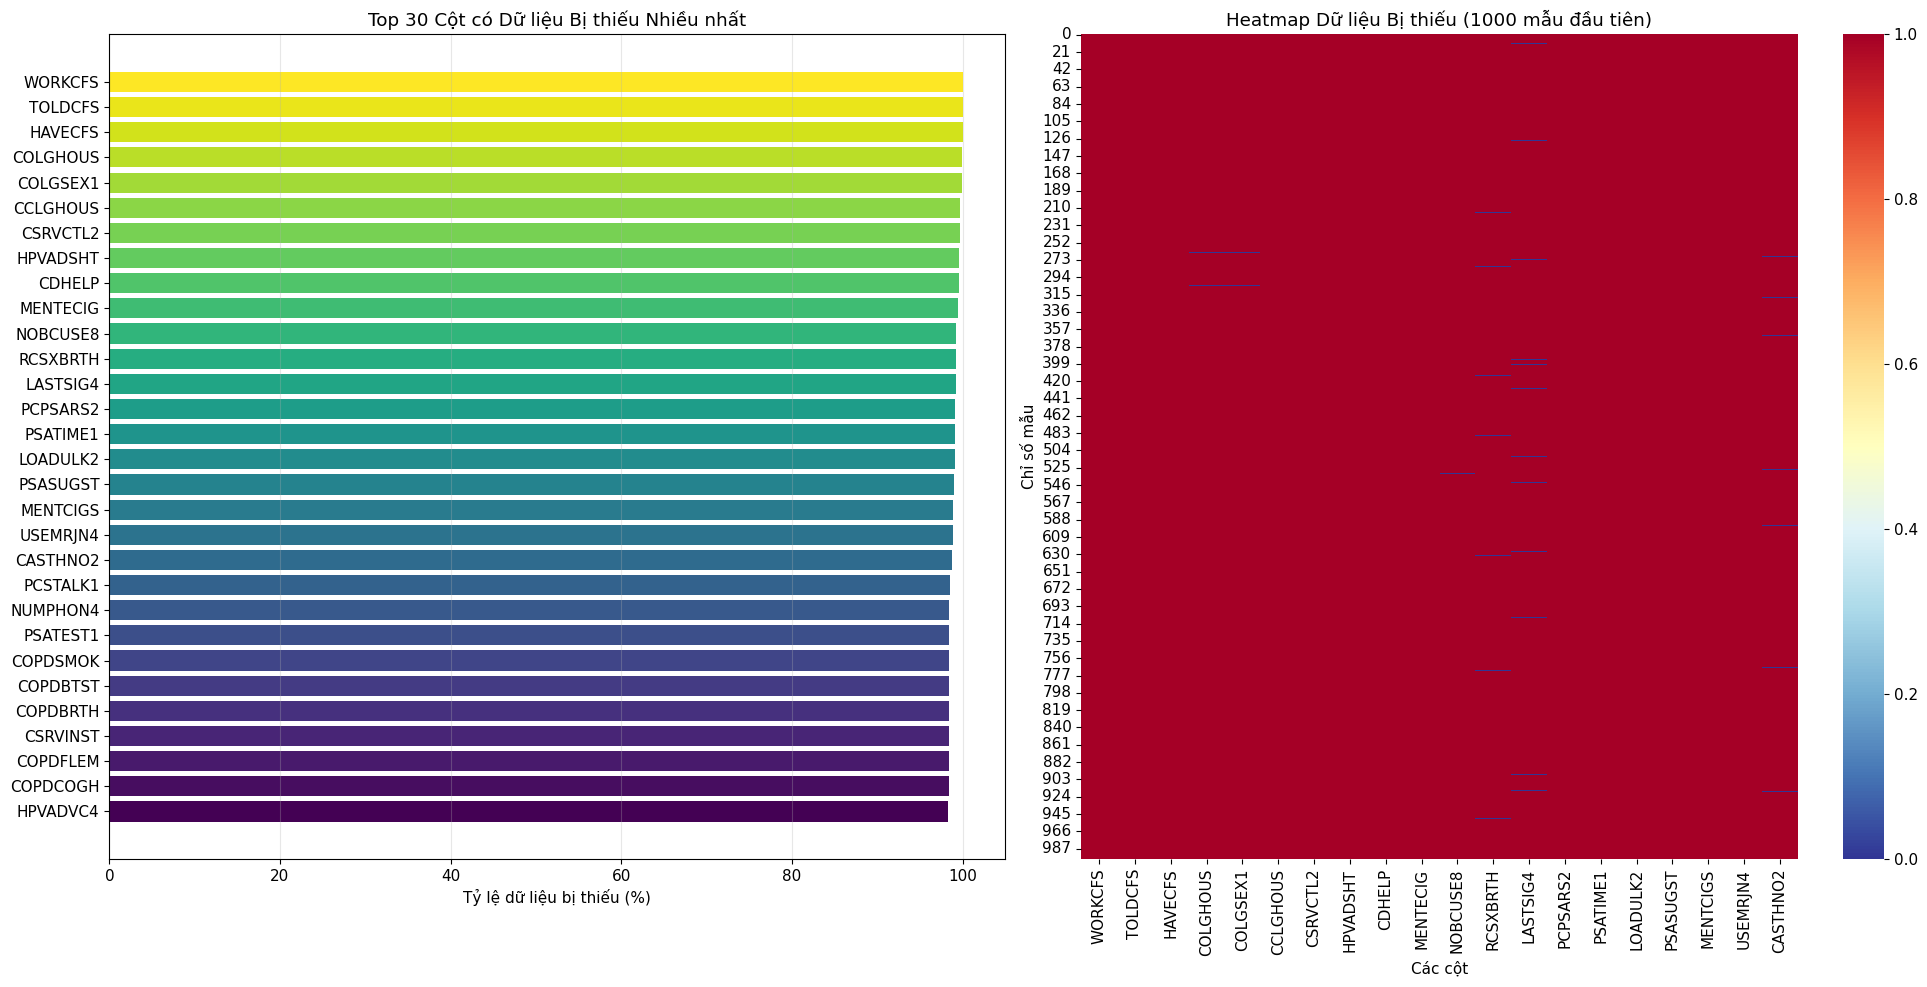

In [ ]:
# Tạo heatmap cho dữ liệu bị thiếu (chỉ các cột có dữ liệu thiếu)
if len(missing_data) > 0:
    # Lấy top 30 cột có nhiều dữ liệu thiếu nhất
    top_missing_cols = missing_data.head(30)['Cột'].tolist()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Biểu đồ cột cho tỷ lệ thiếu
    ax1.barh(range(len(top_missing_cols)), 
             missing_data.head(30)['Tỷ lệ thiếu (%)'][::-1],
             color=plt.cm.viridis(np.linspace(0, 1, len(top_missing_cols))))
    ax1.set_yticks(range(len(top_missing_cols)))
    ax1.set_yticklabels(top_missing_cols[::-1])
    ax1.set_xlabel('Tỷ lệ dữ liệu bị thiếu (%)')
    ax1.set_title('Top 30 Cột có Dữ liệu Bị thiếu Nhiều nhất')
    ax1.grid(axis='x', alpha=0.3)
    
    # Heatmap cho một mẫu dữ liệu (1000 dòng đầu tiên)
    sample_df = df[top_missing_cols[:20]].head(1000)
    sns.heatmap(sample_df.isnull(), 
                cbar=True, 
                cmap='RdYlBu_r',
                ax=ax2)
    ax2.set_title('Heatmap Dữ liệu Bị thiếu (1000 mẫu đầu tiên)')
    ax2.set_xlabel('Các cột')
    ax2.set_ylabel('Chỉ số mẫu')
    
    plt.tight_layout()
    plt.show()
else:
    print("🎉 Tuyệt vời! Không có dữ liệu bị thiếu trong bộ dữ liệu!")


In [ ]:
missing_percentage = df.isnull().sum() * 100 / len(df)
initial_cols = df.shape[1]
print(f"Tổng số cột ban đầu: {initial_cols}\n")

thresholds = [1, 5, 10, 15]

for threshold in thresholds:
    # Tìm các cột có tỷ lệ thiếu lớn hơn ngưỡng
    cols_to_drop = missing_percentage[missing_percentage > threshold].index
    
    # Loại bỏ các cột
    df_dropped = df.drop(columns=cols_to_drop)
    
    remaining_cols = df_dropped.shape[1]
    percentage_remaining = (remaining_cols / initial_cols) * 100

    print(f"--- Khi loại bỏ các cột có hơn {threshold}% giá trị bị thiếu ---")
    print(f"Số cột còn lại: {remaining_cols} ({percentage_remaining:.2f}%)")
    print(f"Số cột đã loại bỏ: {len(cols_to_drop)}")

### Phân tích ảnh hưởng của việc loại bỏ các cột theo ngưỡng thiếu

Chúng ta sẽ kiểm tra xem bộ dữ liệu thay đổi như thế nào khi loại bỏ các cột có tỷ lệ thiếu vượt qua các ngưỡng khác nhau.

In [ ]:
msno.bar(df)
plt.title('Biểu đồ cột tỷ lệ thiếu', fontsize=16)
plt.show()

### Biểu đồ cột tỷ lệ thiếu

Biểu đồ này cho thấy tỷ lệ phần trăm dữ liệu không bị thiếu trong mỗi cột.

In [ ]:
msno.matrix(df)
plt.title('Biểu đồ ma trận dữ liệu thiếu', fontsize=16)
plt.show()

### Biểu đồ ma trận dữ liệu thiếu (tổng quan)

Sử dụng thư viện `missingno` để có cái nhìn trực quan tổng thể về vị trí của các giá trị bị thiếu.

In [ ]:
# Xác định các cột số và cột phân loại
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"📊 THỐNG KÊ LOẠI DỮ LIỆU:")
print("="*50)
print(f"• Số cột số: {len(numerical_cols)}")
print(f"• Số cột phân loại: {len(categorical_cols)}")

# Hiển thị thống kê mô tả cho cột số
print(f"\n📈 THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ:")
print("="*60)
display(df[numerical_cols].describe())


📊 THỐNG KÊ LOẠI DỮ LIỆU:
• Số cột số: 321
• Số cột phân loại: 5

📈 THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ:


_STATE         FMONTH       DISPCODE          _PSU  \
count  445132.000000  445132.000000  445132.000000  4.451320e+05   
mean       31.005942       6.767667    1120.636800  2.022005e+09   
std        16.652065       3.463248      40.469818  4.456324e+03   
min         1.000000       1.000000    1100.000000  2.022000e+09   
25%        18.000000       4.000000    1100.000000  2.022002e+09   
50%        30.000000       7.000000    1100.000000  2.022004e+09   
75%        46.000000      10.000000    1100.000000  2.022008e+09   
max        78.000000      12.000000    1200.000000  2.022026e+09   

           CTELENM1      PVTRESD1  COLGHOUS  STATERE1      CELPHON1  \
count  96051.000000  96050.000000      19.0   96050.0  96052.000000   
mean       1.000021      1.000198       1.0       1.0      1.999979   
std        0.004563      0.014063       0.0       0.0      0.004563   
min        1.000000      1.000000       1.0       1.0      1.000000   
25%        1.000000      1.000000       1.0       1.0      2.000000   
50%        1.000000      1.000000       1.0       1.0      2.000000   
75%        1.000000      1.000000       1.0       1.0      2.000000   
max        2.000000      2.000000       1.0       1.0      2.000000   

            LADULT1  ...       _SMOKGRP       _LCSREC       DRNKANY6  \
count  96050.000000  ...  409670.000000  51453.000000  445132.000000   
mean       1.001718  ...       3.456196      1.903932       2.243148   
std        0.041412  ...       0.804281      0.294688       2.314231   
min        1.000000  ...       1.000000      1.000000       1.000000   
25%        1.000000  ...       3.000000      2.000000       1.000000   
50%        1.000000  ...       4.000000      2.000000       2.000000   
75%        1.000000  ...       4.000000      2.000000       2.000000   
max        2.000000  ...       4.000000      2.000000       9.000000   

            DROCDY4_       _RFBING6       _DRNKWK2       _RFDRHV8  \
count  445128.000000  445132.000000  445132.000000  445132.000000   
mean      109.456129       2.046278   11424.935702       1.952403   
std       271.524707       2.525965   31379.725352       2.509682   
min         0.000000       1.000000       0.000000       1.000000   
25%         0.000000       1.000000       0.000000       1.000000   
50%         7.000000       1.000000      47.000000       1.000000   
75%        43.000000       1.000000     600.000000       1.000000   
max       900.000000       9.000000   99900.000000       9.000000   

            _FLSHOT7       _PNEUMO3       _AIDTST4  
count  168419.000000  168419.000000  398897.000000  
mean        2.385313       2.572804       2.025465  
std         2.709972       2.910744       1.663272  
min         1.000000       1.000000       1.000000  
25%         1.000000       1.000000       1.000000  
50%         1.000000       1.000000       2.000000  
75%         2.000000       2.000000       2.000000  
max         9.000000       9.000000       9.000000  

[8 rows x 321 columns]

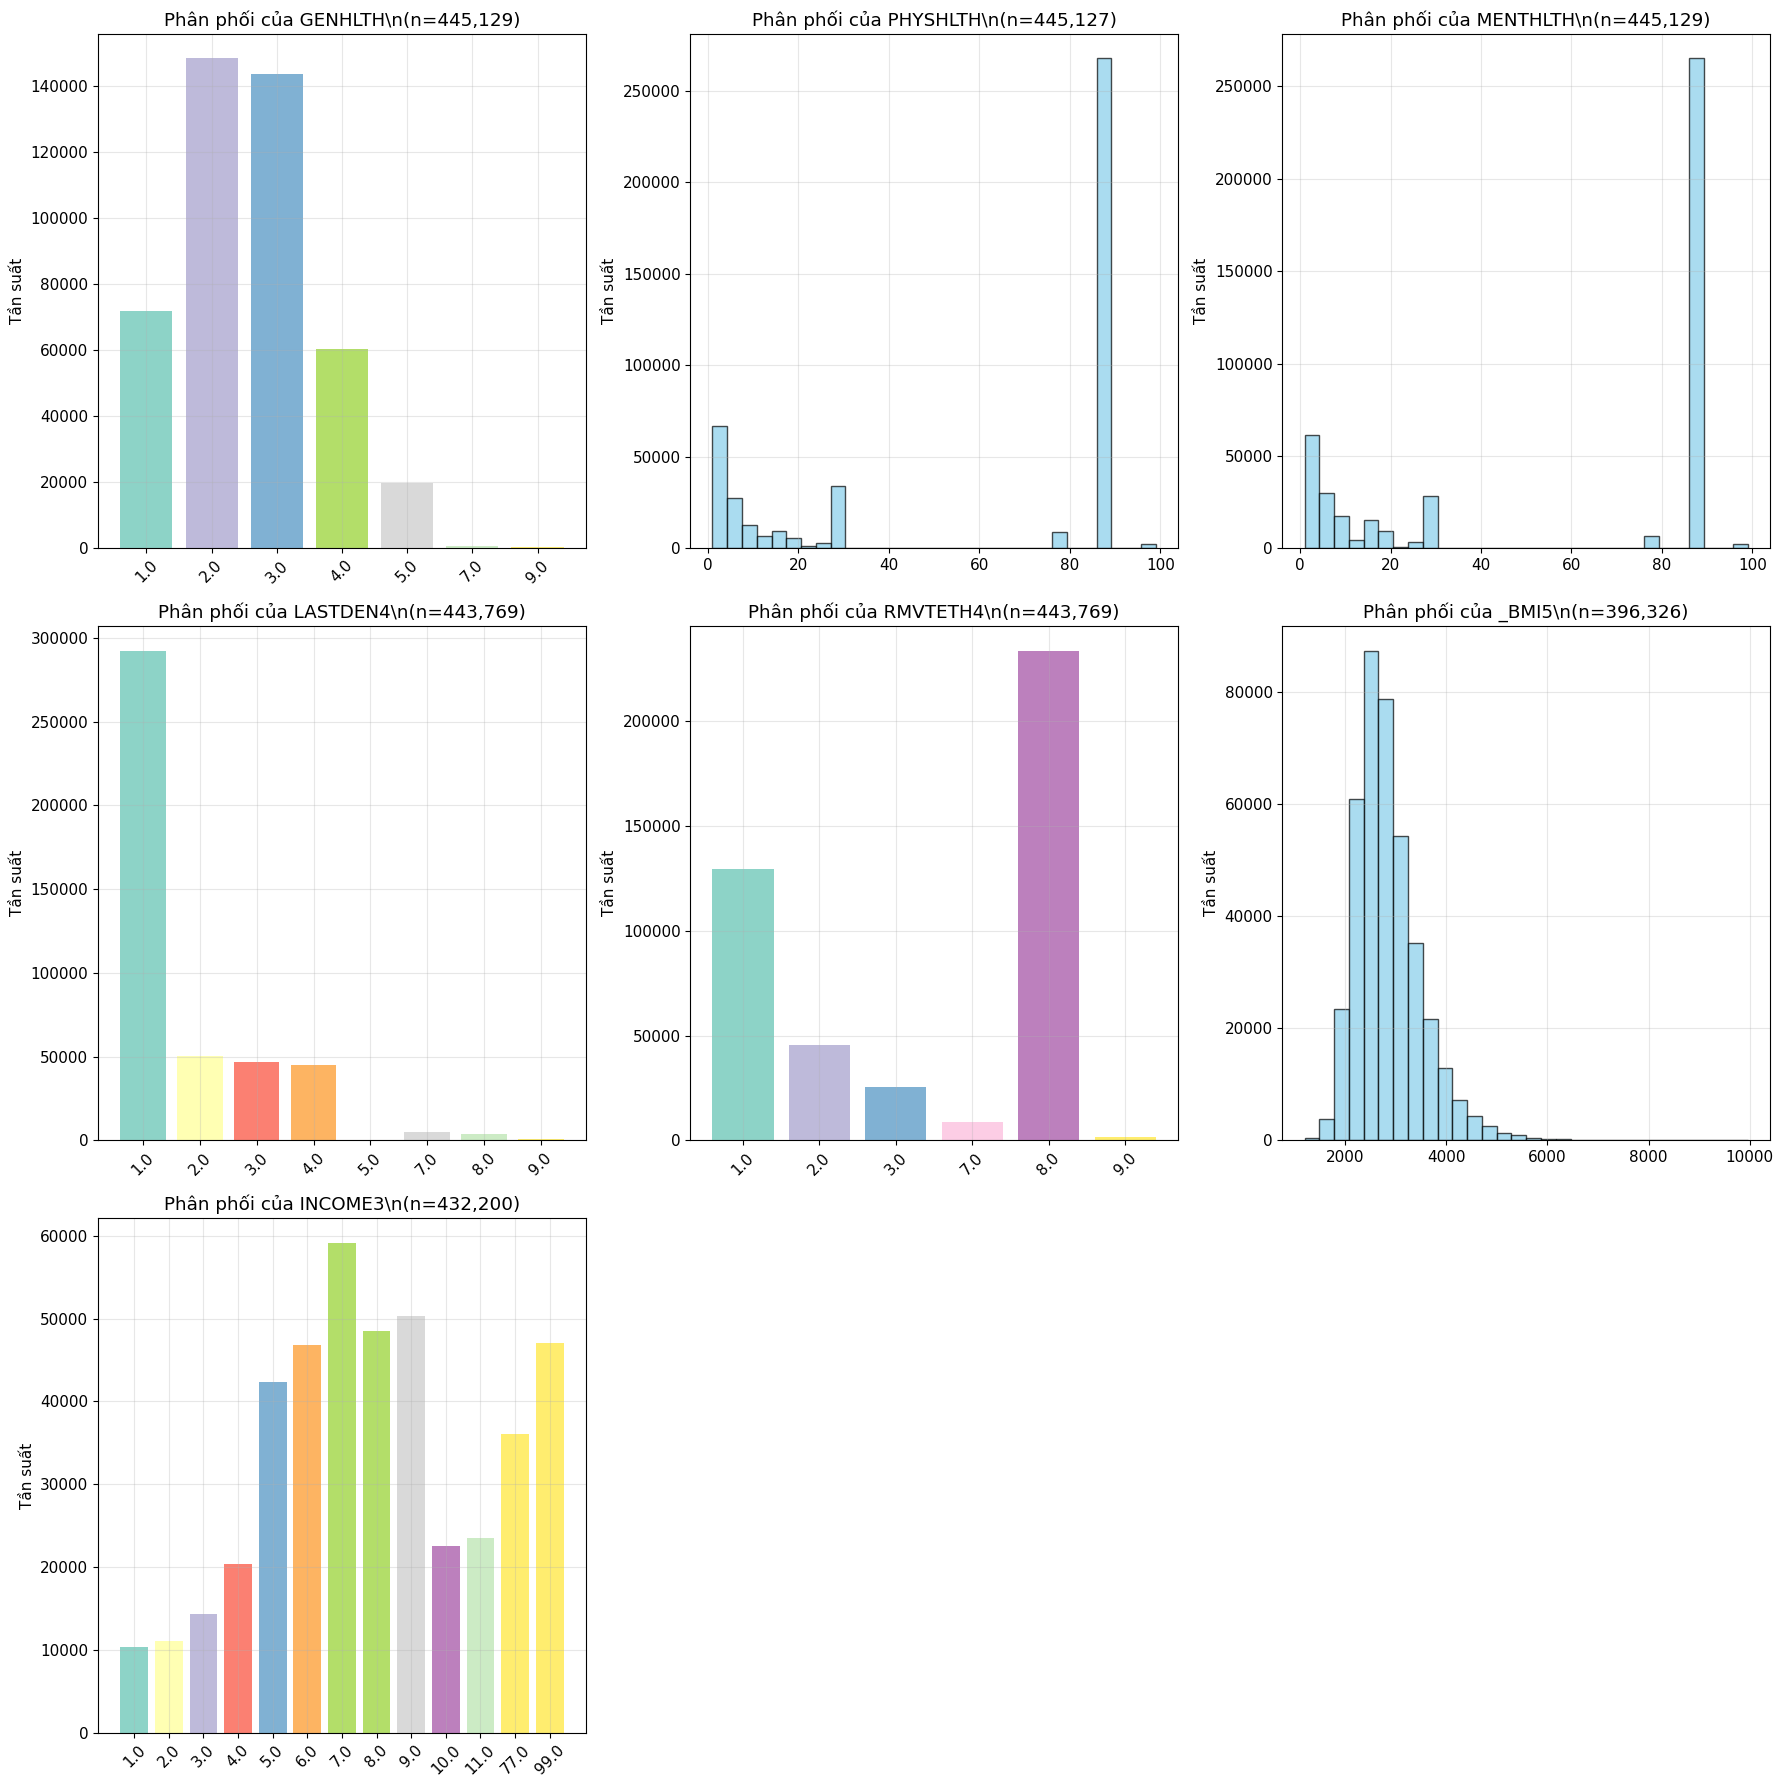

In [ ]:
# Phân tích phân phối cho một số biến quan trọng
important_vars = ['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'LASTDEN4', 'RMVTETH4', '_BMI5', 'INCOME3']
existing_important_vars = [var for var in important_vars if var in df.columns]

if len(existing_important_vars) > 0:
    n_cols = 3
    n_rows = (len(existing_important_vars) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, var in enumerate(existing_important_vars):
        ax = axes[i]
        
        # Loại bỏ NaN trước khi vẽ
        data_clean = df[var].dropna()
        
        if len(data_clean) > 0:
            # Kiểm tra số giá trị unique để quyết định loại biểu đồ
            n_unique = data_clean.nunique()
            
            if n_unique <= 20:  # Biến phân loại hoặc rời rạc
                value_counts = data_clean.value_counts().sort_index()
                ax.bar(range(len(value_counts)), value_counts.values, 
                       color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
                ax.set_xticks(range(len(value_counts)))
                ax.set_xticklabels(value_counts.index, rotation=45)
                ax.set_ylabel('Tần suất')
            else:  # Biến liên tục
                ax.hist(data_clean, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
                ax.set_ylabel('Tần suất')
            
            ax.set_title(f'Phân phối của {var}\\n(n={len(data_clean):,})')
            ax.grid(alpha=0.3)
        else:
            ax.text(0.5, 0.5, 'Không có dữ liệu', 
                   ha='center', va='center', transform=ax.transAxes)
    
    # Ẩn các subplot thừa
    for i in range(len(existing_important_vars), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ Không tìm thấy các biến quan trọng trong dataset!")


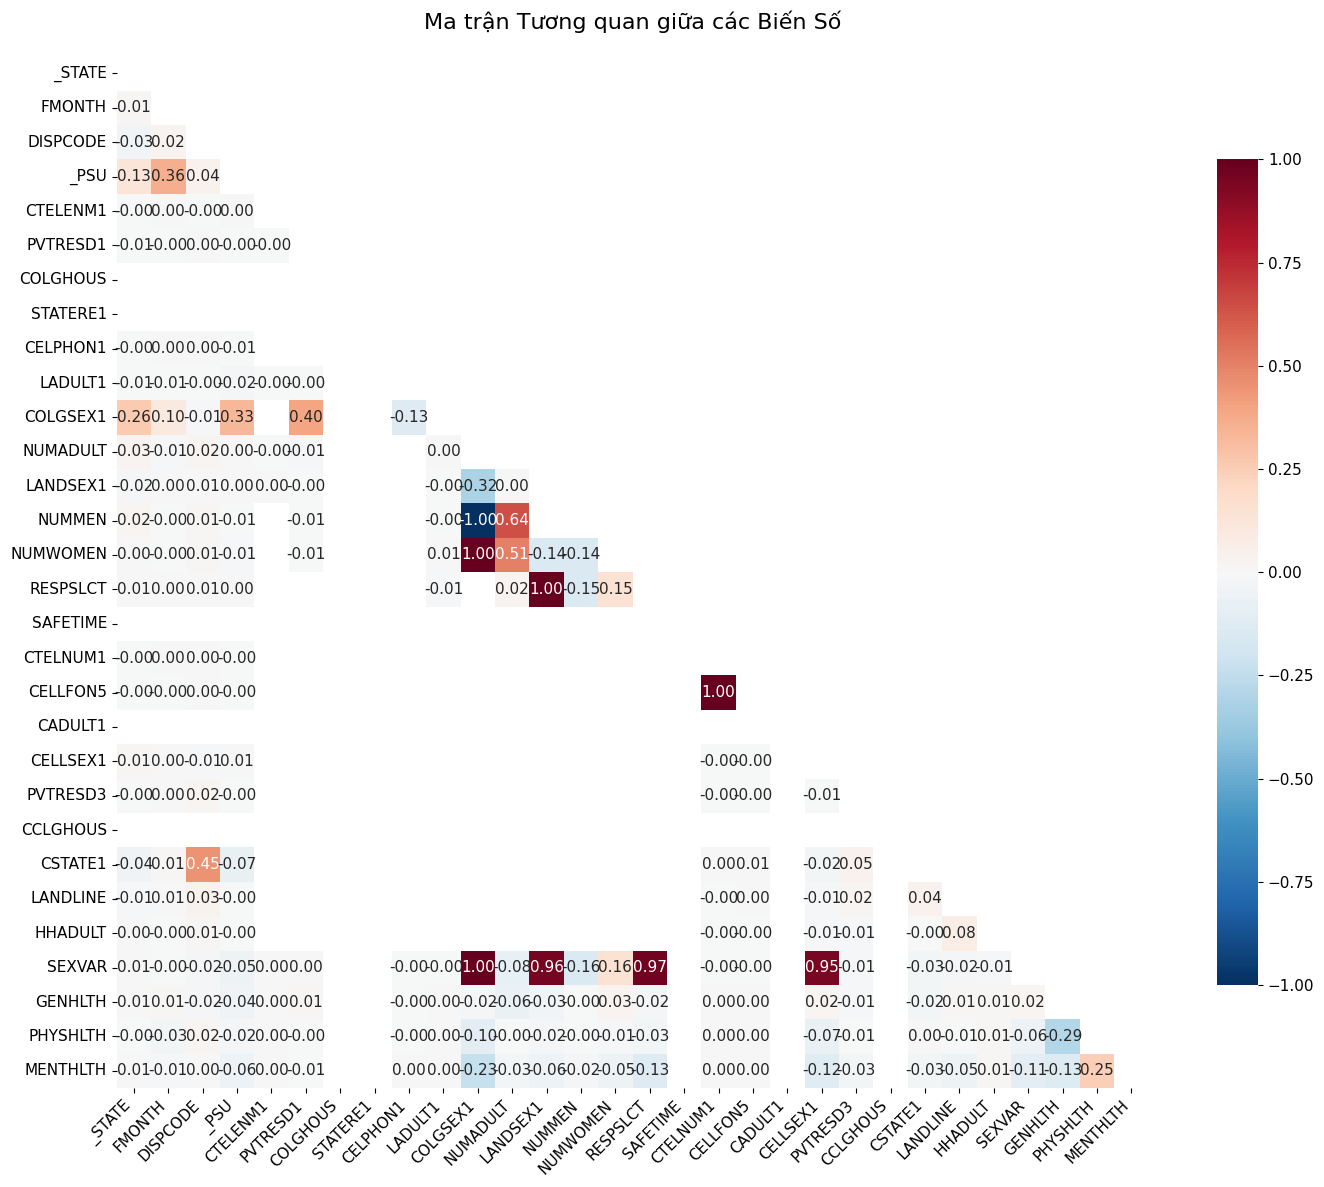

🔍 CÁC CẶP BIẾN CÓ TƯƠNG QUAN CAO (|r| > 0.7):
• COLGSEX1 ↔ NUMMEN: -1.000
• COLGSEX1 ↔ NUMWOMEN: 1.000
• COLGSEX1 ↔ SEXVAR: 1.000
• LANDSEX1 ↔ RESPSLCT: 1.000
• CTELNUM1 ↔ CELLFON5: 1.000
• RESPSLCT ↔ SEXVAR: 0.971
• LANDSEX1 ↔ SEXVAR: 0.960
• CELLSEX1 ↔ SEXVAR: 0.951


In [ ]:
# Tính ma trận tương quan cho các biến số
if len(numerical_cols) > 1:
    # Lấy một mẫu các cột số (tối đa 30 cột để dễ đọc)
    sample_numerical_cols = numerical_cols[:30] if len(numerical_cols) > 30 else numerical_cols
    
    # Tính ma trận tương quan
    correlation_matrix = df[sample_numerical_cols].corr()
    
    # Tạo heatmap
    plt.figure(figsize=(15, 12))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Ẩn tam giác trên
    
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={'shrink': 0.8})
    
    plt.title('Ma trận Tương quan giữa các Biến Số', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Tìm các cặp biến có tương quan cao
    print("🔍 CÁC CẶP BIẾN CÓ TƯƠNG QUAN CAO (|r| > 0.7):")
    print("="*60)
    
    # Lấy tam giác dưới của ma trận tương quan
    correlation_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            
            if abs(corr_value) > 0.7:
                correlation_pairs.append((var1, var2, corr_value))
    
    # Sắp xếp theo giá trị tương quan giảm dần
    correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    if correlation_pairs:
        for var1, var2, corr in correlation_pairs:
            print(f"• {var1} ↔ {var2}: {corr:.3f}")
    else:
        print("Không có cặp biến nào có tương quan > 0.7")
else:
    print("❌ Không đủ biến số để tính tương quan!")


🦷 PHÂN TÍCH CHI TIẾT CÁC BIẾN NHA KHOA:

📊 Biến: LASTDEN4
----------------------------------------
• Số lượng dữ liệu hợp lệ: 443,769
• Số giá trị unique: 8
• Giá trị min: 1.0
• Giá trị max: 9.0
• Top 10 giá trị phổ biến:")
LASTDEN4
1.0    292408
2.0     50326
3.0     46987
4.0     44828
7.0      4866
8.0      3562
9.0       788
5.0         4
Name: count, dtype: int64

📊 Biến: RMVTETH4
----------------------------------------
• Số lượng dữ liệu hợp lệ: 443,769
• Số giá trị unique: 6
• Giá trị min: 1.0
• Giá trị max: 9.0
• Top 10 giá trị phổ biến:")
RMVTETH4
8.0    233455
1.0    129294
2.0     45570
3.0     25453
7.0      8563
9.0      1434
Name: count, dtype: int64

📊 Biến: _DENVST3
----------------------------------------
• Số lượng dữ liệu hợp lệ: 445,128
• Số giá trị unique: 3
• Giá trị min: 1.0
• Giá trị max: 9.0
• Top 10 giá trị phổ biến:")
_DENVST3
1.0    292408
2.0    145703
9.0      7017
Name: count, dtype: int64


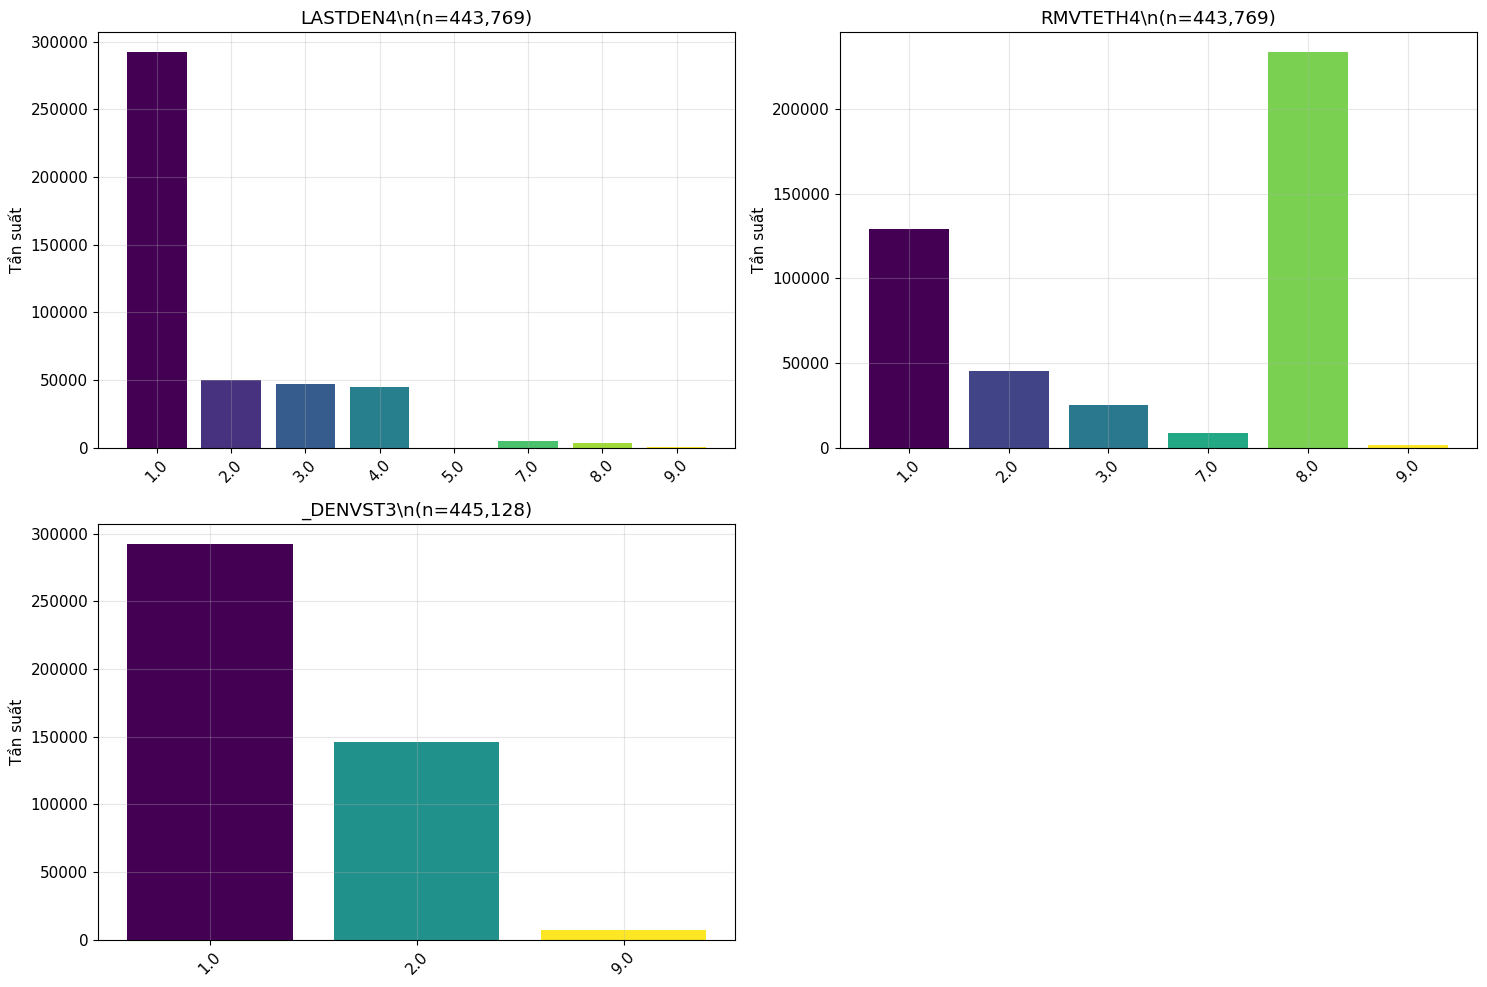

In [ ]:
# Phân tích chi tiết các biến nha khoa
if dental_related_cols:
    print("🦷 PHÂN TÍCH CHI TIẾT CÁC BIẾN NHA KHOA:")
    print("="*60)
    
    for col in dental_related_cols:
        print(f"\n📊 Biến: {col}")
        print("-" * 40)
        
        # Thống kê cơ bản
        non_null_data = df[col].dropna()
        if len(non_null_data) > 0:
            print(f"• Số lượng dữ liệu hợp lệ: {len(non_null_data):,}")
            print(f"• Số giá trị unique: {non_null_data.nunique()}")
            print(f"• Giá trị min: {non_null_data.min()}")
            print(f"• Giá trị max: {non_null_data.max()}")
            
            # Phân phối giá trị
            value_counts = non_null_data.value_counts().head(10)
            print(f"• Top 10 giá trị phổ biến:\")\n{value_counts}")
        else:
            print("• Không có dữ liệu hợp lệ")
            
    # Vẽ biểu đồ cho các biến nha khoa
    if len(dental_related_cols) > 0:
        n_cols = 2
        n_rows = (len(dental_related_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_rows == 1:
            axes = [axes] if len(dental_related_cols) == 1 else axes
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(dental_related_cols):
            ax = axes[i]
            data_clean = df[col].dropna()
            
            if len(data_clean) > 0:
                if data_clean.nunique() <= 20:
                    value_counts = data_clean.value_counts().sort_index()
                    ax.bar(range(len(value_counts)), value_counts.values,
                           color=plt.cm.viridis(np.linspace(0, 1, len(value_counts))))
                    ax.set_xticks(range(len(value_counts)))
                    ax.set_xticklabels(value_counts.index, rotation=45)
                else:
                    ax.hist(data_clean, bins=30, alpha=0.7, color='coral', edgecolor='black')
                
                ax.set_title(f'{col}\\n(n={len(data_clean):,})')
                ax.set_ylabel('Tần suất')
                ax.grid(alpha=0.3)
            else:
                ax.text(0.5, 0.5, 'Không có dữ liệu', 
                       ha='center', va='center', transform=ax.transAxes)
        
        # Ẩn subplot thừa
        for i in range(len(dental_related_cols), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
else:
    print("❌ Không tìm thấy biến nào liên quan đến nha khoa!")


In [ ]:
# Tạo báo cáo tóm tắt EDA
print("📋 BÁO CÁO TÓM TẮT PHÂN TÍCH KHÁM PHÁ DỮ LIỆU")
print("="*70)

print(f"\n🔢 THÔNG TIN TỔNG QUAN:")
print(f"• Tổng số mẫu: {df.shape[0]:,}")
print(f"• Tổng số biến: {df.shape[1]}")
print(f"• Dung lượng bộ nhớ: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n📊 PHÂN LOẠI BIẾN:")
print(f"• Biến số: {len(numerical_cols)}")
print(f"• Biến phân loại: {len(categorical_cols)}")
print(f"• Biến liên quan đến nha khoa: {len(dental_related_cols)}")

print(f"\n❌ DỮ LIỆU BỊ THIẾU:")
total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"• Tổng số ô bị thiếu: {total_missing:,}")
print(f"• Tỷ lệ thiếu tổng thể: {missing_percentage:.2f}%")
print(f"• Số biến có dữ liệu thiếu: {len(missing_data)}")

print(f"\n🎯 BIẾN MỤC TIÊU TIỀM NĂNG:")
potential_targets = []
for col in dental_related_cols:
    if df[col].notna().sum() > 0:
        potential_targets.append(col)

if potential_targets:
    for target in potential_targets:
        missing_pct = (df[target].isnull().sum() / len(df)) * 100
        unique_vals = df[target].nunique()
        print(f"• {target}: {missing_pct:.1f}% thiếu, {unique_vals} giá trị unique")
else:
    print("• Cần xác định biến mục tiêu từ các biến khác")

print(f"\n🔍 KHUYẾN NGHỊ BƯỚC TIẾP THEO:")
print("1. Xác định biến mục tiêu cụ thể cho bài toán")
print("2. Thực hiện imputation cho dữ liệu bị thiếu")
print("3. Feature engineering và feature selection") 
print("4. Chuẩn hóa dữ liệu cho machine learning")
print("5. Chia tập train/test và bắt đầu modeling")

print(f"\n" + "="*70)
print("🏁 HOÀN TẤT PHÂN TÍCH KHÁM PHÁ DỮ LIỆU!")


📋 BÁO CÁO TÓM TẮT PHÂN TÍCH KHÁM PHÁ DỮ LIỆU

🔢 THÔNG TIN TỔNG QUAN:
• Tổng số mẫu: 445,132
• Tổng số biến: 326
• Dung lượng bộ nhớ: 1222.2 MB

📊 PHÂN LOẠI BIẾN:
• Biến số: 321
• Biến phân loại: 5
• Biến liên quan đến nha khoa: 3

❌ DỮ LIỆU BỊ THIẾU:
• Tổng số ô bị thiếu: 74,825,422
• Tỷ lệ thiếu tổng thể: 51.56%
• Số biến có dữ liệu thiếu: 279

🎯 BIẾN MỤC TIÊU TIỀM NĂNG:
• LASTDEN4: 0.3% thiếu, 8 giá trị unique
• RMVTETH4: 0.3% thiếu, 6 giá trị unique
• _DENVST3: 0.0% thiếu, 3 giá trị unique

🔍 KHUYẾN NGHỊ BƯỚC TIẾP THEO:
1. Xác định biến mục tiêu cụ thể cho bài toán
2. Thực hiện imputation cho dữ liệu bị thiếu
3. Feature engineering và feature selection
4. Chuẩn hóa dữ liệu cho machine learning
5. Chia tập train/test và bắt đầu modeling

🏁 HOÀN TẤT PHÂN TÍCH KHÁM PHÁ DỮ LIỆU!


### Phân tích dữ liệu thiếu cho `RMVTETH4`

Chúng ta sẽ kiểm tra số lượng giá trị thiếu (NaN) và các mã đặc biệt khác như "Don't know/Not sure" hoặc "Refused" trong cột `RMVTETH4`. Đây là bước quan trọng để đảm bảo chất lượng của biến mục tiêu Y.

In [12]:
import pandas as pd
import numpy as np

# Tính toán số lượng và tỷ lệ phần trăm của các giá trị đặc biệt trong RMVTETH4
missing_values = df['RMVTETH4'].isnull().sum()
not_sure_values = (df['RMVTETH4'] == 77).sum()
refused_values = (df['RMVTETH4'] == 99).sum()

total_rows = len(df)

print(f"Phân tích dữ liệu thiếu và không hợp lệ cho cột 'RMVTETH4':")
print(f"- Tổng số dòng: {total_rows}")
print(f"- Số giá trị thiếu (NaN): {missing_values} ({missing_values/total_rows:.2%})")
print(f"- Số giá trị 'Không biết/Không chắc' (mã 77): {not_sure_values} ({not_sure_values/total_rows:.2%})")
print(f"- Số giá trị 'Từ chối trả lời' (mã 99): {refused_values} ({refused_values/total_rows:.2%})")

total_invalid = missing_values + not_sure_values + refused_values
print(f"\n- Tổng số dữ liệu thiếu hoặc không hợp lệ: {total_invalid} ({total_invalid/total_rows:.2%})")
df = pd.read_parquet('../data/llcp2022_cleaned.parquet')
# Lọc ra dữ liệu hợp lệ để xem xét
valid_rmvteth4 = df[(df['RMVTETH4'].notnull()) & (df['RMVTETH4'] != 77) & (df['RMVTETH4'] != 99)]
print(f"- Tổng số dữ liệu hợp lệ: {len(valid_rmvteth4)} ({len(valid_rmvteth4)/total_rows:.2%})")

# Trực quan hóa phân phối của dữ liệu RMVTETH4 hợp lệ
import plotly.express as px

fig = px.histogram(valid_rmvteth4, x='RMVTETH4', 
                   title='Phân phối số răng đã nhổ (chỉ dữ liệu hợp lệ)',
                   labels={'RMVTETH4': 'Số răng đã nhổ'})
fig.show()
```

Phân tích dữ liệu thiếu và không hợp lệ cho cột 'RMVTETH4':
- Tổng số dòng: 445132
- Số giá trị thiếu (NaN): 1363 (0.31%)
- Số giá trị 'Không biết/Không chắc' (mã 77): 0 (0.00%)
- Số giá trị 'Từ chối trả lời' (mã 99): 0 (0.00%)

- Tổng số dữ liệu thiếu hoặc không hợp lệ: 1363 (0.31%)
- Tổng số dữ liệu hợp lệ: 443769 (99.69%)
- Tổng số dữ liệu hợp lệ: 443769 (99.69%)
